# Table of Contents

1. [Introduction](#intro)
1. [Data preprocessing](#dat_pre)
    1. [Importing the data](#import)
    1. [Creating data columns](#create_col)
    1. [Census Data](#census)
        1. [New York City Population by Borough, 1950 - 2040](#nyopen)
1. [Exploratory Data Analysis](#eda)
    1. [Info and Summary](#basics)
    1. [Pair Plot](#pair_plot)
    1. [Correlation Matrix](#corr)
    1. [Racial and ethnic diversity of NYC boroughs](#race_bor)
        1. [Absolute population values](#abs_pop)
        1. [Relative population values](#rel_pop)
    1. [Population of NYC over time](#pop_change)
1. [Complaints per Officer and per Precinct](#complaints)
    1. [Absolute number and relative proportion of complaints](#abs_comp)
    1. [Complaints broken down by race](#comp_race)
        1. [Race of complainants](#race_complainants)
        1. [Race of officers](#race_officers)
1. [Complaints over the years](#comp_years)
    1. [Absolute number and relative proportion of complaints](#abs_comp_yr)
    1. [Absolute and relative number of Complaints per borough](#comp_boro_person)
         1. [Absolute number of complaints](#comp_boro_person_abs)
         1. [Relative number of complaints](#comp_boro_person_rel)
1. [Officers with most complaints](#top_offend)
    1. [First Officer](#offend1)
    1. [Second Officer](#offend2)
    1. [Officers with top 5% of complaints](#top10)
1. [Conclusion](#conclu)

# Civilian Complaints Against NYC Police Officers from 1985-2020
### DATS 6103 Individual Project 3
### Izzy Illari (GWID: G38518463)
## Introduction
<a id = "intro"></a>

This data has been taken from the following <a href="https://www.kaggle.com/mrmorj/civilian-complaints-against-nyc-police-officers">kaggle dataset</a> which states:

<blockquote>After New York state repealed the statute that kept police disciplinary records secret, known as 50-a, ProPublica filed a records request with New York City’s Civilian Complaint Review Board, which investigates complaints by the public about NYPD officers. The board provided us with records about closed cases for every police officer still on the force as of late June 2020 who had at least one substantiated allegation against them. The records span decades, from September 1985 to January 2020.</blockquote>

Each record lists:
1. name, 
1. shield number, 
1. rank of officer as of today and at the time of the incident, 
1. precinct of officer as of today and at the time of the incident,
1. age, race, and gender of the complainant, 
1. age, race, and gender of the officer,
1. category describing the alleged misconduct,
1. whether the CCRB concluded the officers’ conduct violated NYPD rules

Currently in the USA we are experiencing another surge of BLM protests that echoes the movements that started back during the Obama administration in 2013. The BLM movement speaks out against the police brutality and systemic racism that has caused the deaths of Black Americans such as Trayvon Martin, Sandra Bland, Tamir Rice, Eric Garner, George Floyd, Breonna Taylor, and many more. The BLM movement has brought the public's attention to the thousands of violent incidents that happen to Black Americans that are not seen and not heard. For incidents that are recorded, we can turn to police reports. 

Although these police reports are insufficient in analyzing the sheer breadth of police encounters that Black Americans must endure with on a daily basis, this does give us a place to start: do the numbers prove what the BLM movement states, and are Black Americans forced to endure more incidents with the police than any other racial and ethnic groups? 

For this project I focus on the number one most populous city in the USA: NYC. NYC is incredibly racially diverse, and each of the five boroughs have different racial and ethnic populations. It is the aim of this project to analyze the available data of incidents with the NYPD and see if any patterns arise from the data that might support the conclusion that Black Americans are disproportionately targeted by the police.

# Data preprocessing
<a id = "dat_pre"></a>

## Importing the data
<a id = "import"></a>

In [1]:
import os
import pandas as pd

# get current working idrectory
path = os.getcwd()
# get path of allegations_202007271729.csv
allegations_path = os.path.join(path, "archive/", "allegations_202007271729.csv")
# create dataframe from the csv
df_allegations = pd.read_csv(allegations_path)
# look at top of csv
df_allegations.head()

unique_mos_id first_name last_name command_now  shield_no  complaint_id  \
0          10004   Jonathan      Ruiz     078 PCT       8409         42835   
1          10007       John     Sears     078 PCT       5952         24601   
2          10007       John     Sears     078 PCT       5952         24601   
3          10007       John     Sears     078 PCT       5952         26146   
4          10009      Noemi    Sierra     078 PCT      24058         40253   

   month_received  year_received  month_closed  year_closed  ...  \
0               7           2019             5         2020  ...   
1              11           2011             8         2012  ...   
2              11           2011             8         2012  ...   
3               7           2012             9         2013  ...   
4               8           2018             2         2019  ...   

  mos_age_incident complainant_ethnicity complainant_gender  \
0               32                 Black             Female   
1               24                 Black               Male   
2               24                 Black               Male   
3               25                 Black               Male   
4               39                   NaN                NaN   

  complainant_age_incident           fado_type                    allegation  \
0                     38.0  Abuse of Authority  Failure to provide RTKA card   
1                     26.0         Discourtesy                        Action   
2                     26.0  Offensive Language                          Race   
3                     45.0  Abuse of Authority                      Question   
4                     16.0               Force                Physical force   

  precinct                                contact_reason  \
0     78.0                       Report-domestic dispute   
1     67.0                              Moving violation   
2     67.0                              Moving violation   
3     67.0  PD suspected C/V of violation/crime - street   
4     67.0                                Report-dispute   

                outcome_description                         board_disposition  
0  No arrest made or summons issued  Substantiated (Command Lvl Instructions)  
1   Moving violation summons issued                   Substantiated (Charges)  
2   Moving violation summons issued                   Substantiated (Charges)  
3  No arrest made or summons issued                   Substantiated (Charges)  
4    Arrest - other violation/crime      Substantiated (Command Discipline A)  

[5 rows x 27 columns]

For the `CCRB Data Layout Table` we will need to import the individual sheets from the excel file.import os

In [2]:
# get path of CCRB Data Layout Table.xlsx
ccrb_path = os.path.join(path, "archive/", "CCRB Data Layout Table.xlsx")
# excel file class to read in the xlsx file using path
xl = pd.ExcelFile(ccrb_path)
# get all the sheet names in the xlsx file
sheet_names = xl.sheet_names
sheet_names

['Layout', 'Rank Abbrevs', 'Command Abbrevs', 'FADO', 'Dispositions']

In [3]:
# create an empty list of datafreames
df_ccrb_list = [None] * len(sheet_names)
# loop through all the sheet names
for i in range(len(sheet_names)):
    # create df from sheet name
    df_temp = pd.read_excel(ccrb_path, sheet_names[i])
    # add temporary df to the list
    df_ccrb_list[i] = df_temp
    print("Dataframe for sheet name", sheet_names[i], ":")
    print()
    print(df_ccrb_list[i].head())
    print("*" * 100)

Dataframe for sheet name Layout :

      field name                                      description   glossary
0  unique_mos_id  unique ID of the officer ("member of service")         NaN
1     first_name                             Officer's first name        NaN
2      last_name                              Officer's last name        NaN
3    command_now     Officer's command assignment as of July 2020  See Tab 3
4   complaint_id                       Unique ID of the complaint        NaN
****************************************************************************************************
Dataframe for sheet name Rank Abbrevs :

  Abbreviation                               Rank
0          POM                     Police Officer
1          POF                     Police Officer
2           PO                     Police Officer
3          PSA  Police Officer Special Assignment
4          SGT                           Sergeant
*************************************************************

The `CCRB Data Layout Table` is needed to explain some of the abbreviations and categories in `allegations_202007271729.csv`, which is why we have imported it. 

## Creating data columns
<a id = "create_col"></a>

Now we're going to create a few new columns. One of these columns will be a full name. Another will be the full date the complaint was received and the full date the incident was closed.

In [4]:
# empty list the length of the number of row in allegations
full_name_all = [None] * len(df_allegations) 
date_received = [None] * len(df_allegations)
date_closed = [None] * len(df_allegations)
for i in range(len(df_allegations)):
    # combine first and last name
    full_name_all[i] = df_allegations.first_name[i] + " " + df_allegations.last_name[i]
    # combine year and month received
    date_received[i] = str(df_allegations.year_received[i]) + "-" + str(df_allegations.month_received[i])
    # combine year and month closed
    date_closed[i] = str(df_allegations.year_closed[i]) + "-" + str(df_allegations.month_closed[i])
# find column number of last name
insert_loc_name = df_allegations.columns.get_loc("last_name")+1
# insert full name after last name column
df_allegations.insert(insert_loc_name, "full_name", full_name_all)
# get location of year_received
insert_loc_rec = df_allegations.columns.get_loc("year_received")+1
# insert date_received after year_receive column
df_allegations.insert(insert_loc_rec, "date_received", date_received)
# get location of year_closed column
insert_loc_close = df_allegations.columns.get_loc("year_closed")+1
# insert date_closed after year_closed column
df_allegations.insert(insert_loc_close, "date_closed", date_closed)
df_allegations.head()

unique_mos_id first_name last_name      full_name command_now  shield_no  \
0          10004   Jonathan      Ruiz  Jonathan Ruiz     078 PCT       8409   
1          10007       John     Sears     John Sears     078 PCT       5952   
2          10007       John     Sears     John Sears     078 PCT       5952   
3          10007       John     Sears     John Sears     078 PCT       5952   
4          10009      Noemi    Sierra   Noemi Sierra     078 PCT      24058   

   complaint_id  month_received  year_received date_received  ...  \
0         42835               7           2019        2019-7  ...   
1         24601              11           2011       2011-11  ...   
2         24601              11           2011       2011-11  ...   
3         26146               7           2012        2012-7  ...   
4         40253               8           2018        2018-8  ...   

   mos_age_incident  complainant_ethnicity complainant_gender  \
0                32                  Black             Female   
1                24                  Black               Male   
2                24                  Black               Male   
3                25                  Black               Male   
4                39                    NaN                NaN   

  complainant_age_incident           fado_type                    allegation  \
0                     38.0  Abuse of Authority  Failure to provide RTKA card   
1                     26.0         Discourtesy                        Action   
2                     26.0  Offensive Language                          Race   
3                     45.0  Abuse of Authority                      Question   
4                     16.0               Force                Physical force   

  precinct                                contact_reason  \
0     78.0                       Report-domestic dispute   
1     67.0                              Moving violation   
2     67.0                              Moving violation   
3     67.0  PD suspected C/V of violation/crime - street   
4     67.0                                Report-dispute   

                outcome_description                         board_disposition  
0  No arrest made or summons issued  Substantiated (Command Lvl Instructions)  
1   Moving violation summons issued                   Substantiated (Charges)  
2   Moving violation summons issued                   Substantiated (Charges)  
3  No arrest made or summons issued                   Substantiated (Charges)  
4    Arrest - other violation/crime      Substantiated (Command Discipline A)  

[5 rows x 30 columns]

In [5]:
print("The smallest precinct number is", min(df_allegations.precinct))
print("The largest precinct number is", max(df_allegations.precinct))

The smallest precinct number is 0.0
The largest precinct number is 1000.0


There is an odd case where a few of the offices have their precinct labelled as `1000` or `0`. There are only 77 police precincts in NYC. The highest number is the 123rd Precinct on Staten Island and the smallest number is the 1st Precinct in Manhattan. I'm going to remove row where `precinct == 1000` and `precinct == 0` because I am not sure which precinct this is supposed to be refering to (it could be an internal number being used to reference a specific entity within the NYPD structure). 

In [6]:
# get rid of rows with the 1000
df_allegations = df_allegations[df_allegations.precinct != 1000]
df_allegations = df_allegations[df_allegations.precinct != 0]
# get rid of rows with the 0
print("The smallest precinct number is", min(df_allegations.precinct))
print("The largest precinct number is", max(df_allegations.precinct))

The smallest precinct number is 1.0
The largest precinct number is 123.0


Now this makes sense! We see that by removing 1000 and 0 we are left with the 123rd Precinct and the 1st Precinct, which is what we expected in the first place.

I'm going to make a new column for `borough`, which will represent the df.name.unique() in which the precinct of the complain was filed. 

In [7]:
# look at the unique values 
df_allegations.precinct.unique()

array([ 78.,  67.,  79.,  77.,  81.,  73.,  90.,  75., 120.,  10.,  25.,
       110.,  83.,  46.,   9.,  28.,   1.,  68.,  70.,  72., 122., 113.,
       101., 100.,   7.,  13.,  71.,  23., 112.,  69.,  32.,  94.,  63.,
        76.,  52.,  47.,  62.,  42.,  84., 115., 109.,   5.,  88.,  14.,
       103., 107., 104.,  40., 108.,  50.,  45.,  18., 102., 114.,  19.,
        20., 106., 105.,  17.,  60.,  34.,  44.,  48.,  41.,  43., 111.,
        49.,  26.,  30.,  33.,   6.,  61., 123., 121.,  66.,  24.,  22.,
        nan])

In [8]:
def borough_conditions(df_in, column_name):
    """
    function to create a list of conditions for boroughs based on a number in precinct

    Parameters
    ----------
    df_in: input dataframe
    column_name: feature name
    
    Returns
    ----------
    conditions: list of conditions via which we will create a new datacolumn based upon these results
    """
    conditions = [
        (df_in[column_name] <= 34), # Manhattan
        (df_in[column_name] >= 40) & (df_in[column_name] <= 52), # Bronx
        (df_in[column_name] >= 60) & (df_in[column_name] <= 94), # Brooklyn
        (df_in[column_name] >= 100) & (df_in[column_name] <= 115), # Queens
        (df_in[column_name] >= 120) & (df_in[column_name] <= 123) # Staten Island
    ]
    return conditions

In [9]:
import numpy as np

# set the conditions
cond_borough = borough_conditions(df_allegations, "precinct")
# create a list with the boroughs we will assign to each condition
borough_names = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
# get location of precinct column
insert_loc_prec = df_allegations.columns.get_loc("precinct")+1
# create a new column and use np.select to assign values to it using our lists as arguments
df_allegations["borough"] = np.select(cond_borough, borough_names)
# replace 0
df_allegations["borough"] = df_allegations["borough"].replace({"0":np.nan, 0:np.nan})
# look at uniques
df_allegations.borough.unique()

array(['Brooklyn', 'Staten Island', 'Manhattan', 'Queens', 'Bronx', nan],
      dtype=object)

Okay, it looks like that worked! We now have the borough associated with the precincts. 

## Census Data
<a id = "census"></a>

Now let's import the `County Population by Characteristics: 2010-2019` from <a href="https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html">The US Census</a>. This data contains the Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin from April 1, 2010 to July 1, 2019 (`cc-est2019-alldata-36.csv`). This csv file is going to need serious reformatting to get the information that I want, but it will be interesting to see the demographics of the boroughs and what conclusions we can draw when compared to the NYPC officer complaints.

In [10]:
# get path of cc-est2019-alldata-36.csv
census_path = os.path.join(path, "archive/", "cc-est2019-alldata-36.csv")
# create dataframe from the csv
df_census = pd.read_csv(census_path)
# look at top of csv
df_census.head()

SUMLEV  STATE  COUNTY    STNAME        CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50     36       1  New York  Albany County     1       0   304204   
1      50     36       1  New York  Albany County     1       1    15286   
2      50     36       1  New York  Albany County     1       2    16131   
3      50     36       1  New York  Albany County     1       3    17639   
4      50     36       1  New York  Albany County     1       4    23752   

   TOT_MALE  TOT_FEMALE  ...  HWAC_MALE  HWAC_FEMALE  HBAC_MALE  HBAC_FEMALE  \
0    147076      157128  ...       5236         5416       2125         2295   
1      7821        7465  ...        488          514        288          277   
2      8224        7907  ...        452          443        275          258   
3      9065        8574  ...        448          435        230          204   
4     11925       11827  ...        632          627        271          283   

   HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  HNAC_MALE  HNAC_FEMALE  
0        361          410        139          141         41           41  
1         44           40         18           12          5            3  
2         31           36         15           11          5            3  
3         33           28         13           12          2            1  
4         50           46         16           15          4            6  

[5 rows x 80 columns]

In [11]:
df_census.shape

(14136, 80)

According to the key for the YEAR variable, a year of 12 means a 7/1/2019 population estimate. We will only look at the 2019 estimates. We will also only be looking at the 5 boroughs. However, this data is sorted by county name, meaning we will need to look at the Bronx County (Bronx),  Kings County (Brooklyn), Queens County (Queens), New York County (Manhattan), and Richmond County (Staten Island). An Age Group of 0 is the population across all ages, which will also be the only age group that we will keep. There are a few columns that I will be combing as well, but first let's reduce the rows before tackling the columns.

In [12]:
# filter for 2019 data
df_census = df_census[df_census["YEAR"] == 12] 
# filter for all combined age groups
df_census = df_census[df_census["AGEGRP"] == 0]
# condition for the relevant counties
condition_counties = [
    "Bronx County", 
    "Kings County",
    "Queens County",
    "New York County",
    "Richmond County"
]
# loop through counties
df_counties = pd.DataFrame(columns = list(df_census.columns))
for i in range(len(condition_counties)):
    df_temp = df_census[df_census["CTYNAME"] == condition_counties[i]]
    df_counties = pd.concat([df_counties, df_temp], ignore_index=True)
df_counties

SUMLEV STATE COUNTY    STNAME          CTYNAME YEAR AGEGRP  TOT_POP  \
0     50    36      5  New York     Bronx County   12      0  1418207   
1     50    36     47  New York     Kings County   12      0  2559903   
2     50    36     81  New York    Queens County   12      0  2253858   
3     50    36     61  New York  New York County   12      0  1628706   
4     50    36     85  New York  Richmond County   12      0   476143   

  TOT_MALE TOT_FEMALE  ... HWAC_MALE HWAC_FEMALE HBAC_MALE HBAC_FEMALE  \
0   669548     748659  ...    254417      283816    110369      127199   
1  1212194    1347709  ...    171663      178258     55280       64253   
2  1093889    1159969  ...    268254      266116     37355       39703   
3   771478     857228  ...    145445      156774     48264       56355   
4   231330     244813  ...     36610       37037      6094        6982   

  HIAC_MALE HIAC_FEMALE HAAC_MALE HAAC_FEMALE HNAC_MALE HNAC_FEMALE  
0     24227       26648      5061        5348      3479        3915  
1     12836       12815      4048        4454      1686        1614  
2     15320       13754      7247        7353      2010        1988  
3     11435       12356      4042        4569      1515        1692  
4      1756        1652       789         776       277         259  

[5 rows x 80 columns]

Okay! We've reduced the rows from 14136 to just 5: the 5 boroughs for population esitmates in 2019 for all age groups. Now I need to combine certain columns. For example, they have `WAC_MALE`/`WAC_FEMALE` (White alone or in combination male/female population), and `WA_MALE`/`WA_FEMALE` (White alone male/female population). i only want the alone or in combination for every race. I will also be creating a column that is the total alone and combined population for both male and female for each race. We also have columns for `Not-Hispanic` and `Hispanic`. This could be useful information to see if, perhaps, individuals that are Hispanic are targeted more, but the original complaints data includes race but not if a person is Hispanic or not. I will exclude these columns.

In [13]:
df_counties.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

It looks like every alone or combined population column has `AC_` in the title, which is what I'll use to filter the columns. The not Hispanic columns start with `NH` and the Hispanic columns start with `H`. I'll also exclude those. 

In [14]:
# search for the specific substring
substring1 = "AC_"
substring2 = "TOM_"
# create empty list
columns_AC = [None] * len(df_counties.columns)
for i in range(len(df_counties.columns)):
    # check if "AC_" is in the column name and it does not start with `NH` or `H`
    if (
        (substring1 in df_counties.columns[i] or substring2 in df_counties.columns[i])  
        and df_counties.columns[i].startswith("NH") == False 
        and df_counties.columns[i].startswith("H") == False):
        # add to list if yes
        columns_AC[i] = df_counties.columns[i]
    else:
        # NAN if not found
        columns_AC[i] = "NAN"
# remove NANs from list
columns_AC = [x for x in columns_AC if str(x) != "NAN"]
# print first 5 results from list
columns_AC[:5]

['TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE']

We need to also keep a few of the other columns in our data, such as the county name.

In [15]:
# first few columns from original dataset
first_cols = ['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE']
first_cols.reverse()
# loop through and instert these into the list
for i in first_cols:
    columns_AC.insert(0, i)
columns_AC[:5]

['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME']

In [16]:
# keep only the columns that are in the list
df_counties = df_counties[columns_AC]
df_counties

SUMLEV STATE COUNTY    STNAME          CTYNAME YEAR AGEGRP  TOT_POP  \
0     50    36      5  New York     Bronx County   12      0  1418207   
1     50    36     47  New York     Kings County   12      0  2559903   
2     50    36     81  New York    Queens County   12      0  2253858   
3     50    36     61  New York  New York County   12      0  1628706   
4     50    36     85  New York  Richmond County   12      0   476143   

  TOT_MALE TOT_FEMALE  ... WAC_MALE WAC_FEMALE BAC_MALE BAC_FEMALE IAC_MALE  \
0   669548     748659  ...   321774     353945   309177     354397    28052   
1  1212194    1347709  ...   651056     676707   404476     503891    19628   
2  1093889    1159969  ...   558054     564330   233757     273631    23842   
3   771478     857228  ...   530574     569504   149738     173474    15222   
4   231330     244813  ...   177474     185845    28825      32815     2812   

  IAC_FEMALE AAC_MALE AAC_FEMALE NAC_MALE NAC_FEMALE  
0      31239    34585      36813     4297       4847  
1      20878   169645     182853     3724       4003  
2      22858   309718     332162     5032       5447  
3      16994   102176     128276     2509       2874  
4       2816    27421      28756      497        476  

[5 rows x 22 columns]

In [17]:
def insert_colum_location(df_in, ethnicity):
    """
    function to add the male and female populations for a specified ethnicity 
    and then inserts this total as a new column right after the FEMALE column for said ethnicity

    Parameters
    ----------
    df_in: input dataframe
    ethnicity: ethnicity as a single character 
        W for white, 
        B for Black, 
        I for American Indian and Alaska Native, 
        A for Asian, 
        N for Native Hawaiian and Other Pacific Islander, and
        TOM for Two or More Races
    
    Returns
    ----------
    df_in: dataframe with the new column
    """
    # column names
    if ethnicity == "TOM":
        male = ethnicity + "_MALE"
        female = ethnicity + "_FEMALE"
        tot = ethnicity + "_TOT"
    else:
        male = ethnicity + "AC_MALE"
        female = ethnicity + "AC_FEMALE"
        tot = ethnicity + "AC_TOT"
    
    # add male and female populations for specific ethnicity
    total_vals = df_in[male] + df_in[female]
    
    # insert location
    insert_loc = df_in.columns.get_loc(female)+1
    
    # insert series into dataframe
    df_in.insert(insert_loc, tot, total_vals)
    
    return df_in

In [18]:
# list of all possible ethnicities
ethnicities_list = ["W", "B", "I", "A", "N", "TOM"]
# loop thru this list
for i in ethnicities_list:
    # call the above function with the specific ethnicity and our dataframe
    df_counties = insert_colum_location(df_counties, i)

In [19]:
# list of the 5 boroughs
boroughs_list = ["Bronx", "Brooklyn", "Queens", "Manhattan", "Staten Island"]
# location of county names
insert_bor = df_counties.columns.get_loc("CTYNAME")+1
# insert boroughs
df_counties.insert(insert_bor, "BOROUGH", boroughs_list)
# delete unnecessary columns
del df_counties["SUMLEV"]
del df_counties["STATE"]
del df_counties["AGEGRP"]
del df_counties["YEAR"]
# location of BOROUGH
insert_yr = df_counties.columns.get_loc("BOROUGH")+1
# insert year
df_counties.insert(insert_yr, "YEAR", 2019)
# change time of year to int
df_counties = df_counties.astype({"YEAR": int})

In [20]:
df_counties

COUNTY    STNAME          CTYNAME        BOROUGH  YEAR  TOT_POP TOT_MALE  \
0      5  New York     Bronx County          Bronx  2019  1418207   669548   
1     47  New York     Kings County       Brooklyn  2019  2559903  1212194   
2     81  New York    Queens County         Queens  2019  2253858  1093889   
3     61  New York  New York County      Manhattan  2019  1628706   771478   
4     85  New York  Richmond County  Staten Island  2019   476143   231330   

  TOT_FEMALE TOM_MALE TOM_FEMALE  ... BAC_TOT IAC_MALE IAC_FEMALE IAC_TOT  \
0     748659    24883      28508  ...  663574    28052      31239   59291   
1    1347709    33203      36965  ...  908367    19628      20878   40506   
2    1159969    33428      34939  ...  507388    23842      22858   46700   
3     857228    25779      30180  ...  323212    15222      16994   32216   
4     244813     5170       5259  ...   61640     2812       2816    5628   

  AAC_MALE AAC_FEMALE AAC_TOT NAC_MALE NAC_FEMALE NAC_TOT  
0    34585      36813   71398     4297       4847    9144  
1   169645     182853  352498     3724       4003    7727  
2   309718     332162  641880     5032       5447   10479  
3   102176     128276  230452     2509       2874    5383  
4    27421      28756   56177      497        476     973  

[5 rows x 26 columns]

In [21]:
df_counties.columns

Index(['COUNTY', 'STNAME', 'CTYNAME', 'BOROUGH', 'YEAR', 'TOT_POP', 'TOT_MALE',
       'TOT_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'TOM_TOT', 'WAC_MALE',
       'WAC_FEMALE', 'WAC_TOT', 'BAC_MALE', 'BAC_FEMALE', 'BAC_TOT',
       'IAC_MALE', 'IAC_FEMALE', 'IAC_TOT', 'AAC_MALE', 'AAC_FEMALE',
       'AAC_TOT', 'NAC_MALE', 'NAC_FEMALE', 'NAC_TOT'],
      dtype='object')

Great! That worked. We now have only the columns and rows we need from the census data.

### New York City Population by Borough, 1950 - 2040
<a id = "nyopen"></a>

The Department of City Planning (DCP) in the city of New York has provided the unadjusted decennial census data from 1950-2000 and projected figures from 2010-2040: summary table of New York City population numbers and percentage share by Borough, including school-age (5 to 17), 65 and Over, and total population. This data can be found on <a href="https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9">the city of New York website</a>. The data was last updated on February 7, 2020, and does not include the racial breakdown of the population but will be useful for when we check how the number of complaints changes over the years in comparison to the population changes.

In [22]:
# get path of New_York_City_Population_by_Borough__1950_-_2040.csv
nycpop_path = os.path.join(path, "archive/", "New_York_City_Population_by_Borough__1950_-_2040.csv")
# create dataframe from the csv
df_nycpop = pd.read_csv(nycpop_path)
# look at top of csv
df_nycpop.head()

Age Group       Borough     1950  1950 - Boro share of NYC total  \
0  Total Population     NYC Total  7891957                          100.00   
1  Total Population         Bronx  1451277                           18.39   
2  Total Population      Brooklyn  2738175                           34.70   
3  Total Population     Manhattan  1960101                           24.84   
4  Total Population        Queens  1550849                           19.65   

      1960  1960 - Boro share of NYC total     1970  \
0  7781984                          100.00  7894862   
1  1424815                           18.31  1471701   
2  2627319                           33.76  2602012   
3  1698281                           21.82  1539233   
4  1809578                           23.25  1986473   

   1970 - Boro share of NYC total     1980  1980 - Boro share of NYC total  \
0                          100.00  7071639                          100.00   
1                           18.64  1168972                           16.53   
2                           32.96  2230936                           31.55   
3                           19.50  1428285                           20.20   
4                           25.16  1891325                           26.75   

   ...     2000  2000 - Boro share of NYC total     2010  \
0  ...  8008278                          100.00  8242624   
1  ...  1332650                           16.64  1385108   
2  ...  2465326                           30.78  2552911   
3  ...  1537195                           19.20  1585873   
4  ...  2229379                           27.84  2250002   

   2010 - Boro share of NYC total     2020  2020 - Boro share of NYC total  \
0                          100.00  8550971                          100.00   
1                           16.80  1446788                           16.92   
2                           30.97  2648452                           30.97   
3                           19.24  1638281                           19.16   
4                           27.30  2330295                           27.25   

      2030  2030 - Boro share of NYC total     2040  \
0  8821027                          100.00  9025145   
1  1518998                           17.22  1579245   
2  2754009                           31.22  2840525   
3  1676720                           19.01  1691617   
4  2373551                           26.91  2412649   

   2040 - Boro share of NYC total  
0                          100.00  
1                           17.50  
2                           31.47  
3                           18.74  
4                           26.73  

[5 rows x 22 columns]

This data is terribly formatted, we're going to need to adjust it alot.

In [23]:
# make copy of nycpop data
df_nycpop_copy = df_nycpop.copy(deep=True)
# delete columns
del df_nycpop_copy["Age Group"]
# melt the data to convert columns to rows
df_nycpop_copy.melt(id_vars=["Borough"], 
        var_name = [], 
        value_name = "Value")
# show data
df_nycpop_copy.head()

Borough     1950  1950 - Boro share of NYC total     1960  \
0     NYC Total  7891957                          100.00  7781984   
1         Bronx  1451277                           18.39  1424815   
2      Brooklyn  2738175                           34.70  2627319   
3     Manhattan  1960101                           24.84  1698281   
4        Queens  1550849                           19.65  1809578   

   1960 - Boro share of NYC total     1970  1970 - Boro share of NYC total  \
0                          100.00  7894862                          100.00   
1                           18.31  1471701                           18.64   
2                           33.76  2602012                           32.96   
3                           21.82  1539233                           19.50   
4                           23.25  1986473                           25.16   

      1980  1980 - Boro share of NYC total     1990  ...     2000  \
0  7071639                          100.00  7322564  ...  8008278   
1  1168972                           16.53  1203789  ...  1332650   
2  2230936                           31.55  2300664  ...  2465326   
3  1428285                           20.20  1487536  ...  1537195   
4  1891325                           26.75  1951598  ...  2229379   

   2000 - Boro share of NYC total     2010  2010 - Boro share of NYC total  \
0                          100.00  8242624                          100.00   
1                           16.64  1385108                           16.80   
2                           30.78  2552911                           30.97   
3                           19.20  1585873                           19.24   
4                           27.84  2250002                           27.30   

      2020  2020 - Boro share of NYC total     2030  \
0  8550971                          100.00  8821027   
1  1446788                           16.92  1518998   
2  2648452                           30.97  2754009   
3  1638281                           19.16  1676720   
4  2330295                           27.25  2373551   

   2030 - Boro share of NYC total     2040  2040 - Boro share of NYC total  
0                          100.00  9025145                          100.00  
1                           17.22  1579245                           17.50  
2                           31.22  2840525                           31.47  
3                           19.01  1691617                           18.74  
4                           26.91  2412649                           26.73  

[5 rows x 21 columns]

In [24]:
# create list from column names
nypop_cols = df_nycpop_copy.columns.to_list()
# get rid of first column
nypop_cols.pop(0)
# empty lists
list_rawdat = ["nan"] * len(nypop_cols)
list_remove = ["nan"] * len(nypop_cols)
# sreach string
substring_search = "- Boro share of NYC total"
for i in range(len(nypop_cols)):
    if substring_search in nypop_cols[i]:
        list_remove[i] = nypop_cols[i]
    else:
        list_rawdat[i] = nypop_cols[i]
# remove "nan" entries
list_remove = [x for x in list_remove if str(x) != 'nan']
list_rawdat = [x for x in list_rawdat if str(x) != 'nan']

In [25]:
# remove last 2 elements
list_rawdat.pop(len(list_rawdat)-1)
list_rawdat.pop(len(list_rawdat)-1)
# check list
list_rawdat

['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

In [26]:
# add last two elements of previous list
list_remove.append('2030')
list_remove.append('2040')
# check list
list_remove

['1950 - Boro share of NYC total',
 '1960 - Boro share of NYC total',
 '1970 - Boro share of NYC total',
 '1980 - Boro share of NYC total',
 '1990 - Boro share of NYC total',
 '2000 - Boro share of NYC total',
 '2010 - Boro share of NYC total',
 '2020 - Boro share of NYC total',
 '2030 - Boro share of NYC total',
 '2040 - Boro share of NYC total',
 '2030',
 '2040']

In [27]:
# remove specified columns
for i in list_remove:
    del df_nycpop_copy[i]
df_nycpop_copy

Borough     1950     1960     1970     1980     1990     2000  \
0         NYC Total  7891957  7781984  7894862  7071639  7322564  8008278   
1             Bronx  1451277  1424815  1471701  1168972  1203789  1332650   
2          Brooklyn  2738175  2627319  2602012  2230936  2300664  2465326   
3         Manhattan  1960101  1698281  1539233  1428285  1487536  1537195   
4            Queens  1550849  1809578  1986473  1891325  1951598  2229379   
5     Staten Island   191555   221991   295443   352121   378977   443728   

      2010     2020  
0  8242624  8550971  
1  1385108  1446788  
2  2552911  2648452  
3  1585873  1638281  
4  2250002  2330295  
5   468730   487155

In [28]:
# melt all columns except borough into rows
df_nycpop_copy = df_nycpop_copy.melt(id_vars=["Borough"], 
        var_name = "Year", 
        value_name = "Population")
df_nycpop_copy.head()

Borough  Year  Population
0     NYC Total  1950     7891957
1         Bronx  1950     1451277
2      Brooklyn  1950     2738175
3     Manhattan  1950     1960101
4        Queens  1950     1550849

In [29]:
# change variable type
df_nycpop_copy = df_nycpop_copy.astype({"Year": int, "Population": int})
df_nycpop_copy.dtypes

Borough       object
Year           int64
Population     int64
dtype: object

In [30]:
# remove all years smaller than 1980
df_nycpop_copy = df_nycpop_copy[df_nycpop_copy.Year > 1970]
df_nycpop_copy.head()

Borough  Year  Population
18     NYC Total  1980     7071639
19         Bronx  1980     1168972
20      Brooklyn  1980     2230936
21     Manhattan  1980     1428285
22        Queens  1980     1891325

I want to create a "normalized" population value, where I will take the 1980 values and essentially set those to "zero", or my base line. Then I will take the population as a change in population from 1980, rather than an absolute value. 

In [31]:
# create lists
loc_list = list(df_nycpop_copy["Borough"].unique())
pop_1980_list = ["nan"] * len(loc_list)
# make df of only 1980
df_pop_1980 = df_nycpop_copy.loc[df_nycpop_copy["Year"] == 1980, ["Borough", "Population"]]
# loop through boroughs
for i in range(len(loc_list)):
    pop_1980_list[i] = df_pop_1980.loc[df_pop_1980["Borough"] == loc_list[i], ["Population"]].iloc[0]["Population"]
# population vals
pop_1980_list

[7071639, 1168972, 2230936, 1428285, 1891325, 352121]

In [32]:
# new list of 1980 populations length of df
pop_1980_full = pop_1980_list + pop_1980_list + pop_1980_list + pop_1980_list + pop_1980_list
# divide populations by 1980s vals
df_nycpop_copy["Population Change Since 1980"] = df_nycpop_copy["Population"]/pop_1980_full
df_nycpop_copy.tail()

Borough  Year  Population  Population Change Since 1980
43             Bronx  2020     1446788                      1.237658
44          Brooklyn  2020     2648452                      1.187148
45         Manhattan  2020     1638281                      1.147027
46            Queens  2020     2330295                      1.232097
47     Staten Island  2020      487155                      1.383487

Great, we've got our absolute population for NYC and her boroughs from 1980-2020 as well as the change in population from 1980 levels. I'm also going to want the percentages as well to combine to this.

In [33]:
# add column names to list
list_rawdat.append('2030')
list_rawdat.append('2040')
list_rawdat.append('2030 - Boro share of NYC total')
list_rawdat.append('2040 - Boro share of NYC total')
list_rawdat.append('1950 - Boro share of NYC total')
list_rawdat.append('1960 - Boro share of NYC total')
list_rawdat.append('1970 - Boro share of NYC total')
list_rawdat.append('Age Group')
list_rawdat

['1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2010',
 '2020',
 '2030',
 '2040',
 '2030 - Boro share of NYC total',
 '2040 - Boro share of NYC total',
 '1950 - Boro share of NYC total',
 '1960 - Boro share of NYC total',
 '1970 - Boro share of NYC total',
 'Age Group']

In [34]:
# make another copy of the original data
df_nycpop_copy2 = df_nycpop.copy(deep=True)
# remove unncesessary columns
for i in list_rawdat:
    del df_nycpop_copy2[i]
df_nycpop_copy2

Borough  1980 - Boro share of NYC total  \
0         NYC Total                          100.00   
1             Bronx                           16.53   
2          Brooklyn                           31.55   
3         Manhattan                           20.20   
4            Queens                           26.75   
5     Staten Island                            4.98   

   1990 - Boro share of NYC total  2000 - Boro share of NYC total  \
0                          100.00                          100.00   
1                           16.44                           16.64   
2                           31.42                           30.78   
3                           20.31                           19.20   
4                           26.65                           27.84   
5                            5.18                            5.54   

   2010 - Boro share of NYC total  2020 - Boro share of NYC total  
0                          100.00                          100.00  
1                           16.80                           16.92  
2                           30.97                           30.97  
3                           19.24                           19.16  
4                           27.30                           27.25  
5                            5.69                            5.70

In [35]:
# rename columns
df_nycpop_copy2 = df_nycpop_copy2.rename(columns = {
    '1980 - Boro share of NYC total': '1980', 
    '1990 - Boro share of NYC total': '1990',
    '2000 - Boro share of NYC total': '2000',
    '2010 - Boro share of NYC total': '2010',
    '2020 - Boro share of NYC total': '2020'
})
# melt columns into row
df_nycpop_copy2 = df_nycpop_copy2.melt(id_vars=["Borough"], 
        var_name = "Year", 
        value_name = "Boro share of NYC total")
df_nycpop_copy2.head()

Borough  Year  Boro share of NYC total
0     NYC Total  1980                   100.00
1         Bronx  1980                    16.53
2      Brooklyn  1980                    31.55
3     Manhattan  1980                    20.20
4        Queens  1980                    26.75

Great, now we have all the population data we'll need (for now). Any additional changes (such as taking the log of values) will be performed later.

# Exploratory Data Analysis
<a id = "eda"></a>

## Info and Summary
<a id = "basics"></a>

Let's take a look at the data! We'll be looking at a summary of the data as well as some pairplots and correlation matrices, just to get a feel for what we're working with.

In [36]:
df_allegations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33334 entries, 0 to 33357
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33334 non-null  int64  
 1   first_name                33334 non-null  object 
 2   last_name                 33334 non-null  object 
 3   full_name                 33334 non-null  object 
 4   command_now               33334 non-null  object 
 5   shield_no                 33334 non-null  int64  
 6   complaint_id              33334 non-null  int64  
 7   month_received            33334 non-null  int64  
 8   year_received             33334 non-null  int64  
 9   date_received             33334 non-null  object 
 10  month_closed              33334 non-null  int64  
 11  year_closed               33334 non-null  int64  
 12  date_closed               33334 non-null  object 
 13  command_at_incident       31802 non-null  object 
 14  rank_a

## Pair Plot
<a id = "pair_plot"></a>

Let's see if anything interesting can be observed in a pairplot of the allegation data.

In [37]:
import seaborn as sns
sns.set(color_codes=True)
from  matplotlib import pyplot as plt
%matplotlib inline 
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

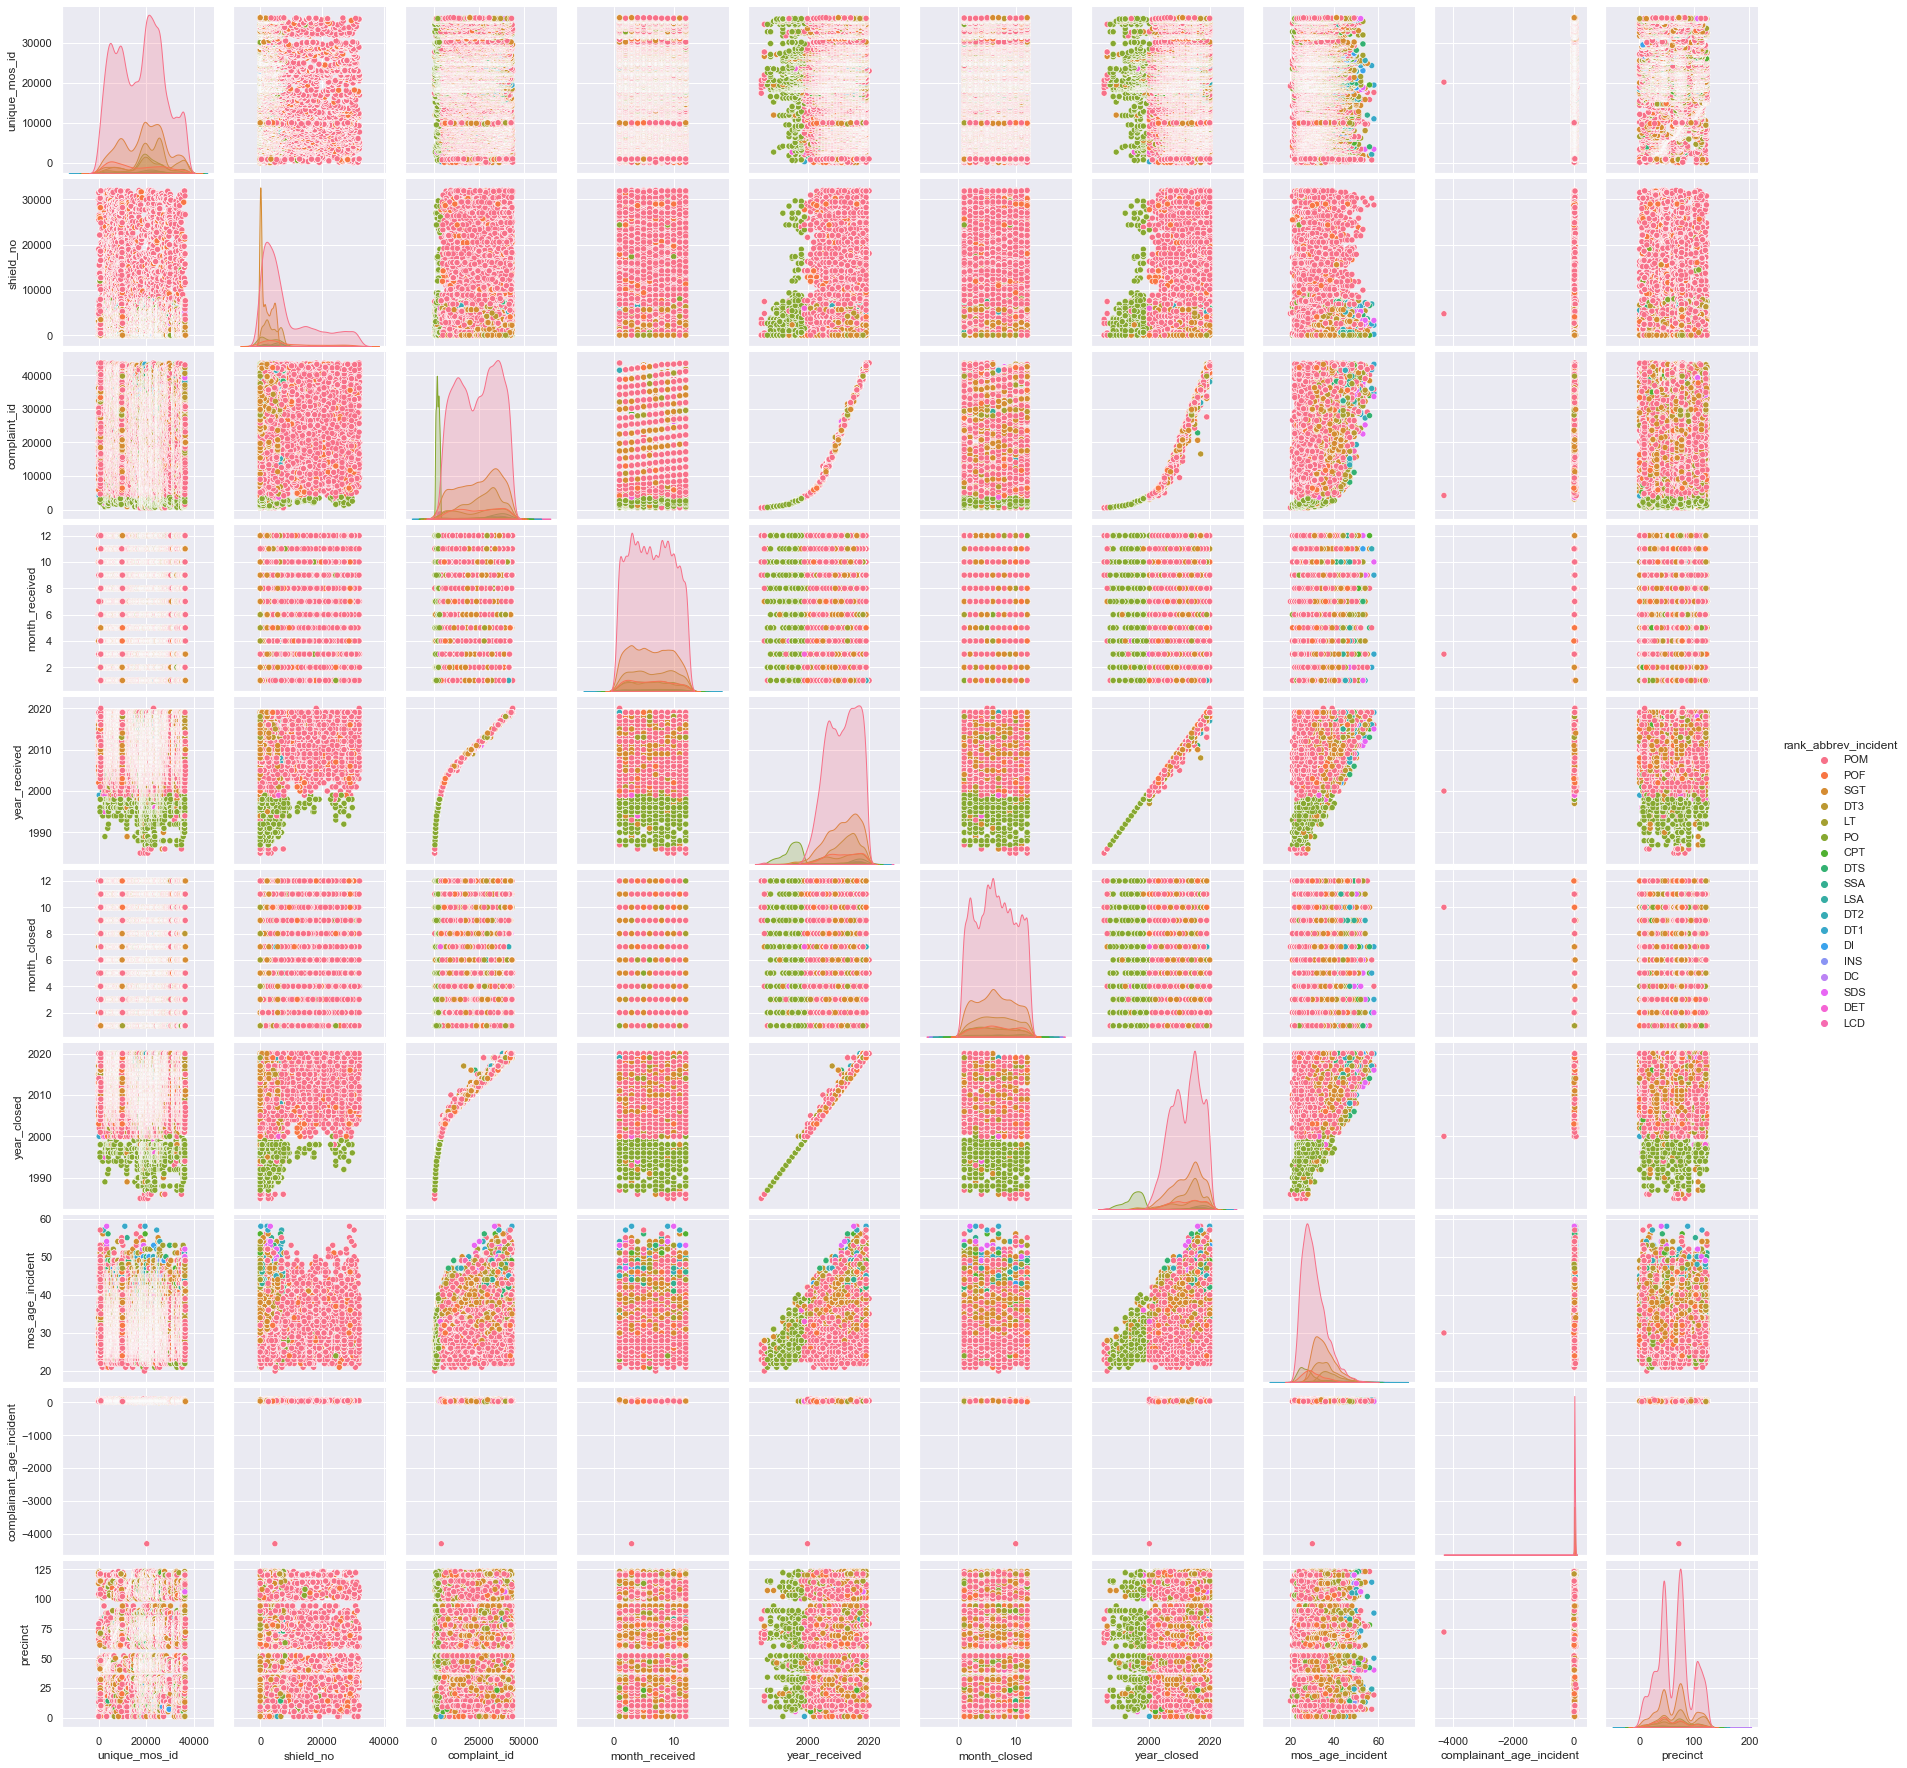

In [38]:
plot_pair = sns.pairplot(
    data = df_allegations, 
    hue = "rank_abbrev_incident"
)

plt.show()

This pairsplot is not *great* to look at. We see that most of these compalaints are made about `Police Officers` (as opposed to `Sergeant` or `Lieutenant`). 

## Correlation Matrix
<a id = "corr"></a>

Let's see if anything interesting can be observed in a correlation matrix of the allegation data.

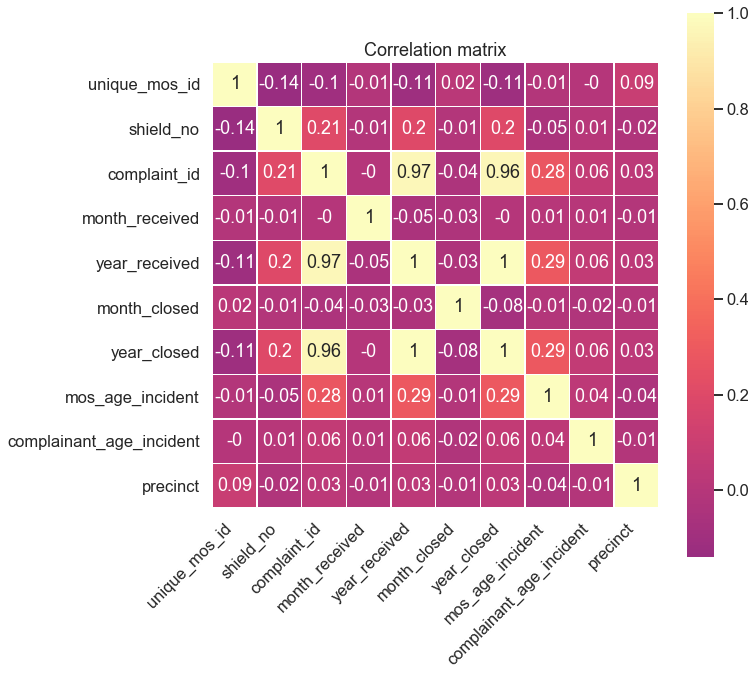

In [39]:
corr = df_allegations.corr(method='pearson')
corr = round(corr, 2)

# set the context as a talk with larger font 
sns.set_context("talk", font_scale = 1) 

# manually set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

hm1 = sns.heatmap(
    data = corr,
    center = 0, 
    cmap = sns.color_palette("magma", as_cmap=True),
    square = True, 
    annot = True, 
    linewidths=.5,
    ax = ax
)

hm1.set_xticklabels(
    hm1.get_xticklabels(),
    rotation = 45, 
    horizontalalignment = 'right'
);

hm1.set_title("Correlation matrix");

It doesn't look like there are any surprising correlations in this data. We have that the `year_received` and `year_closed` are highly correlated, and that the `complaint_id` is highly correlated with the `year_closed`, leading me to believe that the `complaint_id` must be a number that involves the year the complaint is closed. However, for the most part, the correlations amongst the features are fairly weak.

## Racial and ethnic diversity of NYC boroughs
<a id = "race_bor"></a>

### Absolute population values
<a id = "abs_pop"></a>

Since we have the data let's change the racial and ethnic diversity of the five NYC boroughs. First we will look at the raw population values.

In [40]:
import matplotlib.ticker as ticker

def make_barplot_census(df_in, xVal, yVal, position, yscale, yscaleChara, titleVal, ylabelVal, xlabelVal):
    """
    function to create the barplots for the census data

    Parameters
    ----------
    df_in: input dataframe
    xVal: the column for the x axis
    yVal: the column for the y axis
    position: position of the figure (ax)
    yscale: scale of the y axis (e.g. 1e6)
    yscaleChara: letter to represent y axis scale (e.g. M)
    rotationVal: rotation (in degrees) of the x axis labels
    titleVal: the main title string 
    ylabelVal: the y axis title string 
    xlabelVal: the x axis title string
    
    Returns
    ----------
    plot: the formatted barplot with data
    """
    plot = sns.barplot(
        data = df_in, 
        x = xVal,
        y = yVal,
        hue = xVal,
        palette = "colorblind", 
        ax = position
    )
    
    # set plot labels
    plot.set(
        title = titleVal,
        ylabel = ylabelVal, 
        xlabel = xlabelVal,
        xticklabels = []
    )
    
    # set yaxis scale
    position.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/yscale) + yscaleChara))
    
    # remove legend
    #plot.legend_.remove()
    
    return plot

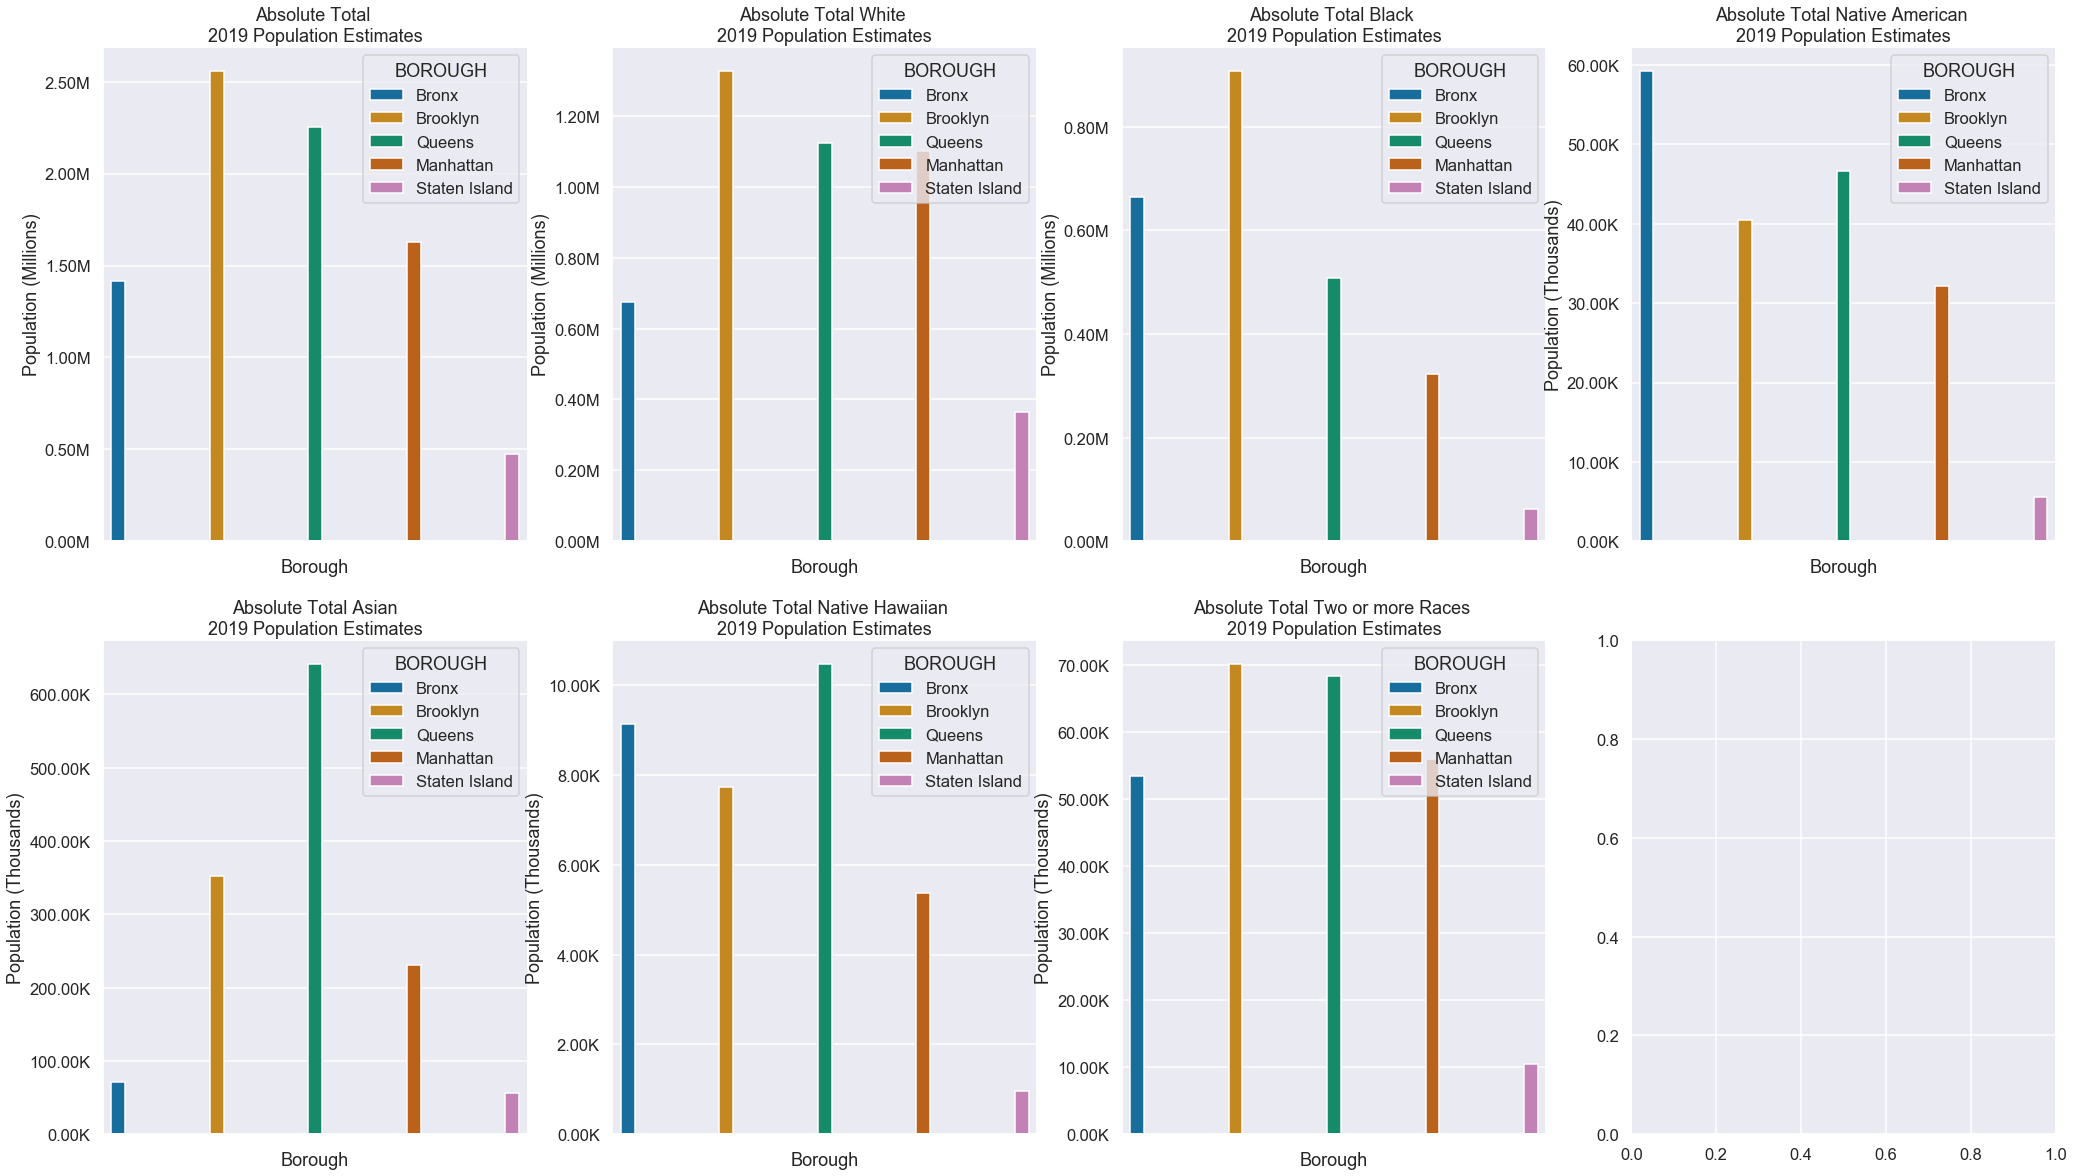

In [41]:
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax14)) = plt.subplots(2, 4, sharey = False, figsize=(35, 20))

# total population
plot_totpop_count = make_barplot_census(df_counties, "BOROUGH", "TOT_POP", 
                                        ax00, 1e6, "M", 
                                        "Absolute Total \n2019 Population Estimates", 
                                        "Population (Millions)", "Borough"
                                       )
# total white population
plot_totwac_count = make_barplot_census(df_counties, "BOROUGH", "WAC_TOT", 
                                        ax01, 1e6, "M", 
                                        "Absolute Total White \n2019 Population Estimates", 
                                        "Population (Millions)", "Borough"
                                       )
# total black population
plot_totbac_count = make_barplot_census(df_counties, "BOROUGH", "BAC_TOT", 
                                        ax02, 1e6, "M", 
                                        "Absolute Total Black \n2019 Population Estimates", 
                                        "Population (Millions)", "Borough"
                                       )
# total native american population
plot_totnac_count = make_barplot_census(df_counties, "BOROUGH", "IAC_TOT", 
                                        ax03, 1e3, "K", 
                                        "Absolute Total Native American \n2019 Population Estimates", 
                                        "Population (Thousands)", "Borough"
                                       )
# total asian population
plot_totaac_count = make_barplot_census(df_counties, "BOROUGH", "AAC_TOT", 
                                        ax10, 1e3, "K", 
                                        "Absolute Total Asian\n2019 Population Estimates", 
                                        "Population (Thousands)", "Borough"
                                       )
# total native hawaiian population
plot_totnac_count = make_barplot_census(df_counties, "BOROUGH", "NAC_TOT", 
                                        ax11, 1e3, "K", 
                                        "Absolute Total Native Hawaiian \n2019 Population Estimates", 
                                        "Population (Thousands)", "Borough"
                                       )
# total tom population
plot_tottom_count = make_barplot_census(df_counties, "BOROUGH", "TOM_TOT", 
                                        ax12, 1e3, "K", 
                                        "Absolute Total Two or more Races \n2019 Population Estimates", 
                                        "Population (Thousands)", "Borough"
                                       )

plt.show()

We can see that Brooklyn (\~2.5 million) and Queens (\~2.3 million) have the highest populations and that Staten Island (\~0.5 million) has the lowest. Brooklyn has the most white and black people of all the boroughs, whereas Queens has the most Asiand and Native Hawaiian individuals. Brooklyn and Queens appear to be pretty much tied for the number of people that are two or more races, whereas the Bronx has the most Native American individuals. 

### Relative population values
<a id = "rel_pop"></a>

Let's look at the relative population of the boroughs for racial and ethnic diversity. This will require me to make a few new columns in the data.

In [42]:
tot_list = ["nan"] * len(df_counties.columns)
substring3 = "_TOT"
for i in df_counties.columns:
    if substring3 in i:
        tot_list.append(i)
tot_list = [x for x in tot_list if str(x) != 'nan']
tot_list

['TOM_TOT', 'WAC_TOT', 'BAC_TOT', 'IAC_TOT', 'AAC_TOT', 'NAC_TOT']

In [43]:
for i in tot_list:
    temp_series = (df_counties[i]/df_counties["TOT_POP"])*100
    temp_colName = i.replace("_TOT", "_REL")
    df_counties[temp_colName] = temp_series

In [44]:
df_counties

COUNTY    STNAME          CTYNAME        BOROUGH  YEAR  TOT_POP TOT_MALE  \
0      5  New York     Bronx County          Bronx  2019  1418207   669548   
1     47  New York     Kings County       Brooklyn  2019  2559903  1212194   
2     81  New York    Queens County         Queens  2019  2253858  1093889   
3     61  New York  New York County      Manhattan  2019  1628706   771478   
4     85  New York  Richmond County  Staten Island  2019   476143   231330   

  TOT_FEMALE TOM_MALE TOM_FEMALE  ... AAC_TOT NAC_MALE NAC_FEMALE NAC_TOT  \
0     748659    24883      28508  ...   71398     4297       4847    9144   
1    1347709    33203      36965  ...  352498     3724       4003    7727   
2    1159969    33428      34939  ...  641880     5032       5447   10479   
3     857228    25779      30180  ...  230452     2509       2874    5383   
4     244813     5170       5259  ...   56177      497        476     973   

   TOM_REL  WAC_REL  BAC_REL  IAC_REL  AAC_REL   NAC_REL  
0  3.76468   47.646  46.7896   4.1807  5.03438  0.644758  
1  2.74104  51.8677  35.4844  1.58233    13.77  0.301847  
2  3.03333  49.7983   22.512    2.072  28.4792  0.464936  
3   3.4358  67.5431  19.8447  1.97801  14.1494  0.330508  
4  2.19031  76.3046  12.9457    1.182  11.7983   0.20435  

[5 rows x 32 columns]

With our relative populations we can plot these results.

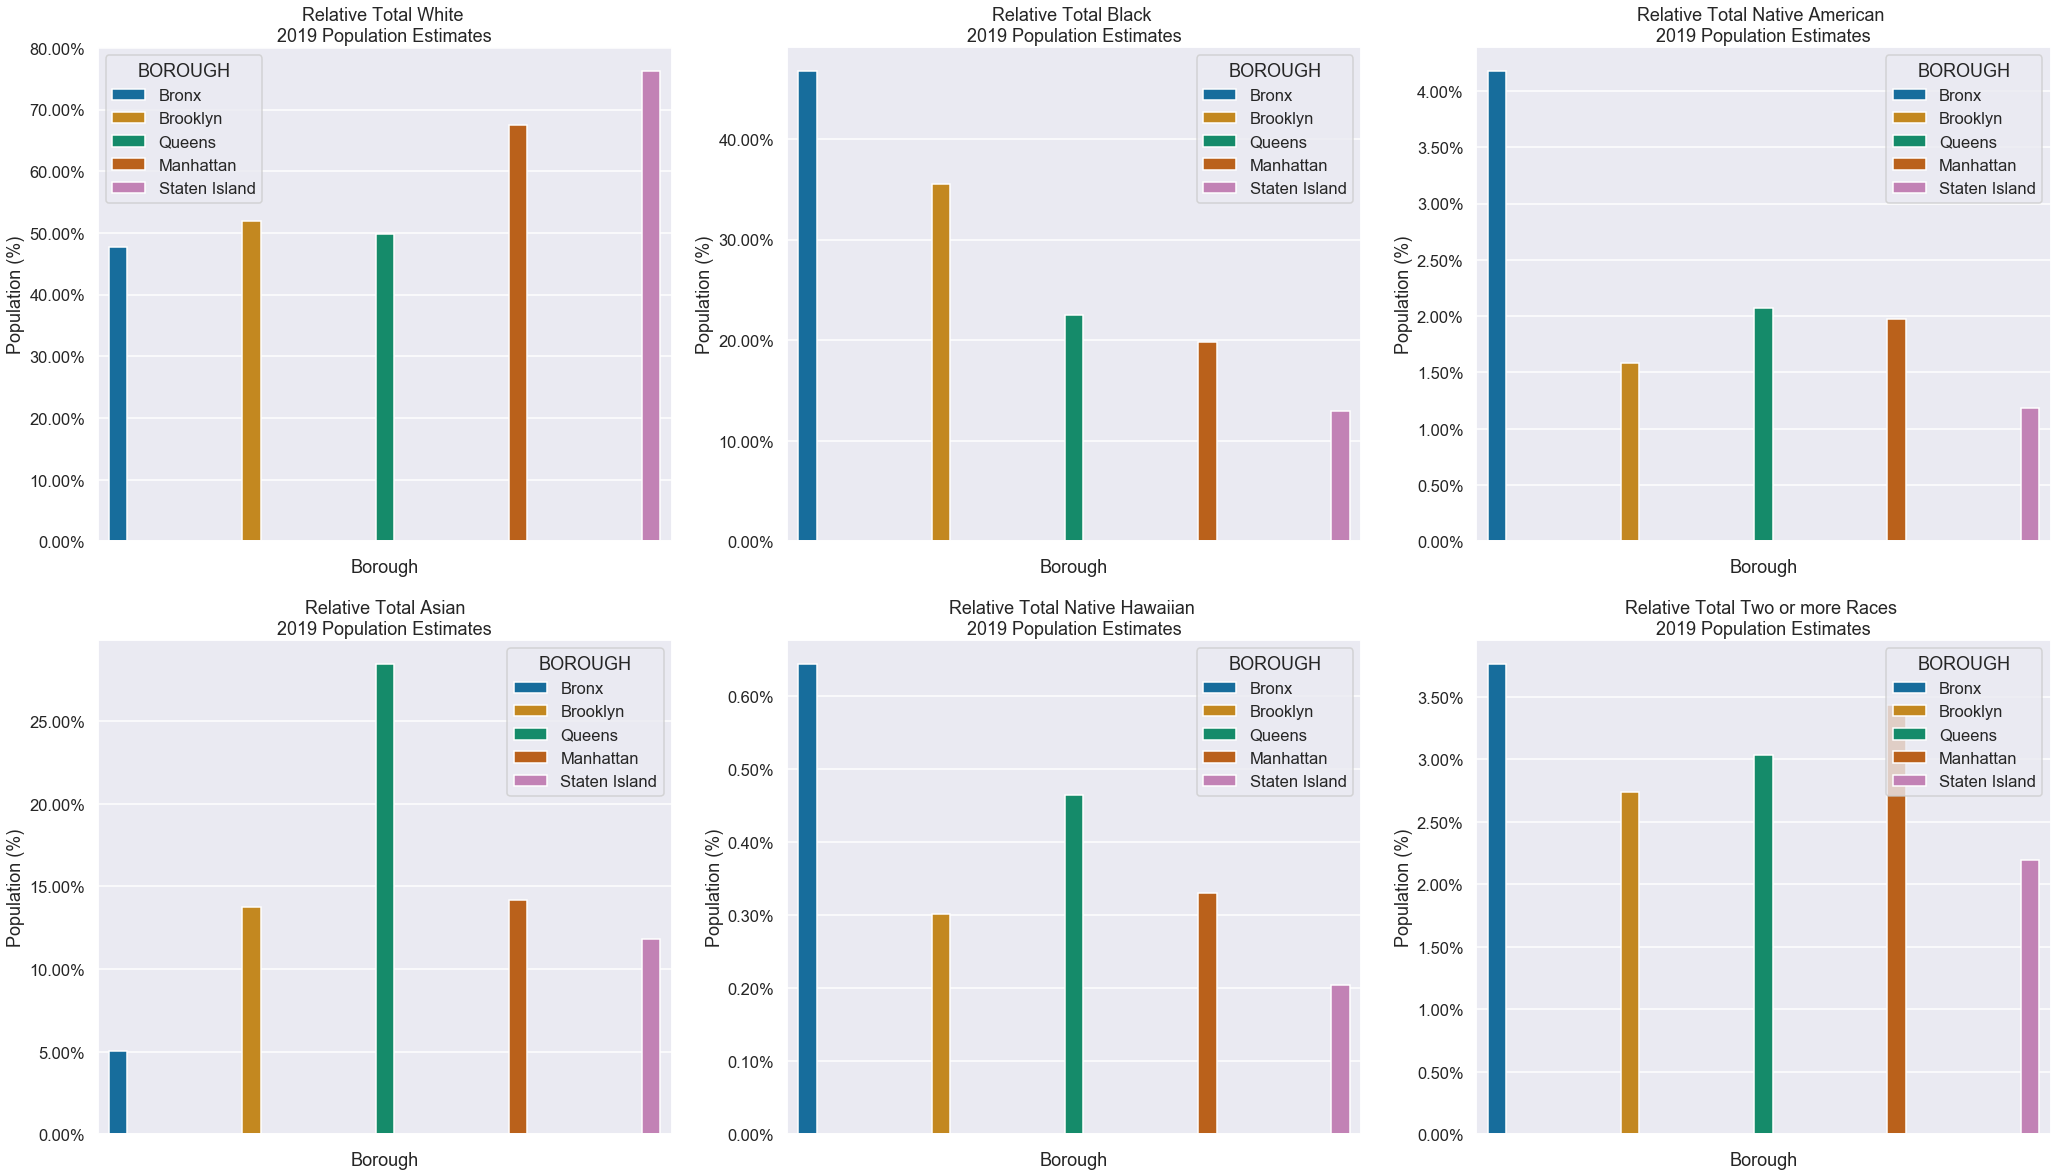

In [45]:
fig, ((ax00, ax01, ax02), (ax10, ax11, ax12)) = plt.subplots(2, 3, sharey = False, figsize=(35, 20))

# total white population
plot_rel_wac = make_barplot_census(df_counties, "BOROUGH", "WAC_REL", 
                                        ax00, 1, "%", 
                                        "Relative Total White \n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )
# total black population
plot_rel_bac = make_barplot_census(df_counties, "BOROUGH", "BAC_REL", 
                                        ax01, 1, "%", 
                                        "Relative Total Black \n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )
# total native american population
plot_rel_iac = make_barplot_census(df_counties, "BOROUGH", "IAC_REL", 
                                        ax02, 1, "%", 
                                        "Relative Total Native American \n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )
# total asian population
plot_rel_aac = make_barplot_census(df_counties, "BOROUGH", "AAC_REL", 
                                        ax10, 1, "%", 
                                        "Relative Total Asian\n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )
# total native hawaiian population
plot_rel_nac = make_barplot_census(df_counties, "BOROUGH", "NAC_REL", 
                                        ax11, 1, "%", 
                                        "Relative Total Native Hawaiian \n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )
# total tom population
plot_rel_tom = make_barplot_census(df_counties, "BOROUGH", "TOM_REL", 
                                        ax12, 1, "%", 
                                        "Relative Total Two or more Races \n2019 Population Estimates", 
                                        "Population (%)", "Borough"
                                       )

plt.show()

This paints a different picture than the raw/absolute population values. We can see that even though Staten Island has the smallest absolute population, it has the highest proportion of white people, as opposed to how Brooklyn had the highest absolute population of whites. Queens still has (propostionally) the most Asian individuals, but now we see that the Bronx leads in black, Native Hawaiian, and Two or more Races categories. We see that proportionally Manhattan is \~70% white, and does not lead in any other category of race. We see that the Bronx is fairly diverse, it has the smallest proportional white population but does very well in every other category (except for Asians). We also see that Brooklyn is fairly diverse as well. with large proportional black and mixed race groups. 

It will be interesting to see which boroughs have the most amount of complaints. We expect that the more racially diverse boroughs have large numbers of police complaints, whereas the whiter boroughs might have fewer complaints against the NYPD.

## Population of NYC over time
<a id = "pop_change"></a>

Let's look at how the population in NYC has changed over time. This will be usefull when looking at the change in the number of complaints.

In [46]:
def make_linplot(df_in, xVal, yVal, hueVal, axPosition, yScale, yScaleChar, titleLab, xLab, yLab):
    """
    function to create a custom lineplot

    Parameters
    ----------
    df_in: input dataframe
    xVal: column for x axis
    yVal: column for y axis
    hueVal: column for hue
    axPosition: position of plot in the subplot grid
    yScale: scale of y axis
    yScaleChar: character to represent scale of y axis
    titleLab: the main title string
    xLab: the x axis title string
    yLab: the y axis title string
    
    Returns
    ----------
    plot: the custom line plot
    """
    
    plot = sns.lineplot(
        data = df_in, 
        x = xVal, 
        y = yVal,
        palette = "colorblind",
        hue = hueVal,
        ax = axPosition
    )

    plot.set(
        title = titleLab,
        xlabel = xLab, 
        ylabel = yLab
    )

    axPosition.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/yScale) + yScaleChar))

In [47]:
# take the log of the population 
df_nycpop_copy["Log of Population"] = np.log(df_nycpop_copy["Population"])
df_nycpop_copy.head()

Borough  Year  Population  Population Change Since 1980  \
18     NYC Total  1980     7071639                           1.0   
19         Bronx  1980     1168972                           1.0   
20      Brooklyn  1980     2230936                           1.0   
21     Manhattan  1980     1428285                           1.0   
22        Queens  1980     1891325                           1.0   

    Log of Population  
18          15.771603  
19          13.971635  
20          14.617932  
21          14.171985  
22          14.452788

In [48]:
# remove NYC tot from percentages
df_nycpop_copy2 = df_nycpop_copy2[df_nycpop_copy2.Borough != "NYC Total"]
df_nycpop_copy2.head()

Borough  Year  Boro share of NYC total
1             Bronx  1980                    16.53
2          Brooklyn  1980                    31.55
3         Manhattan  1980                    20.20
4            Queens  1980                    26.75
5     Staten Island  1980                     4.98

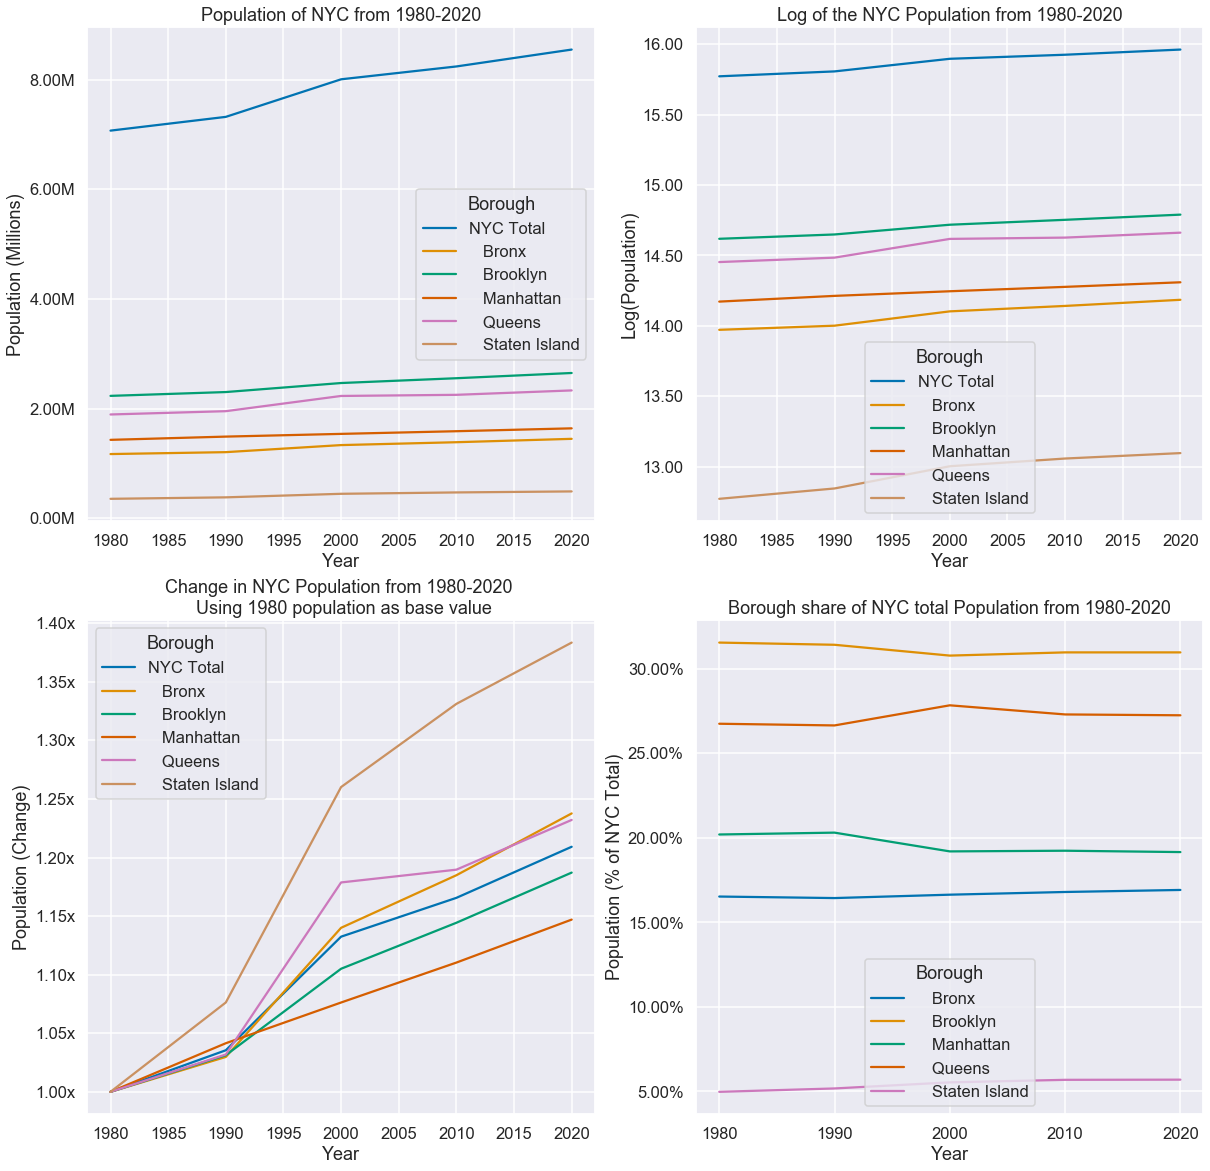

In [49]:
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, sharey = False, figsize = (20, 20))

plot_nycpop = make_linplot(df_nycpop_copy, "Year", "Population", "Borough", ax00, 1e6, "M", 
                           "Population of NYC from 1980-2020", "Year", "Population (Millions)")

plot_nycpop_log = make_linplot(df_nycpop_copy, "Year", "Log of Population", "Borough", ax01, 1, "", 
                           "Log of the NYC Population from 1980-2020", "Year", "Log(Population)")

plot_nycpop_rel = make_linplot(df_nycpop_copy, "Year", "Population Change Since 1980", "Borough", ax10, 1, "x", 
                           "Change in NYC Population from 1980-2020 \n Using 1980 population as base value", 
                               "Year", "Population (Change)")

plot_nycpop_share = make_linplot(df_nycpop_copy2, "Year", "Boro share of NYC total", "Borough", ax11, 1, "%", 
                           "Borough share of NYC total Population from 1980-2020", 
                               "Year", "Population (% of NYC Total)")

plt.show()

In terms of population growth each borough increases at a slower rate than the total of NYC, which makes sense. The log of the population was included to tease out the behavior of the boroughs bunched together with populations of \~1 million. It seems that most of the boroughs have pretty much been around the same percentage of NYC's total population, in that Brooklyn is consistently over 30% of NYC total, Queens is around 27%, Statent Island stays around 5% and so on. The biggest observable change is if we compare the population change from 1980 to 2020. If we take the 1980 population as the "base" value and normalize the other years by this value, we can find a change from the 1980 Population. We see that in 2020 the Bronx is at almost 1.4x that of what it was in 1980. The Bronx has had the most dramatic change in population from 1980, Queens experienced a small spike in 2000, and Manhattan has been noticeably linear in its growth. 

We will see how the number of complaints from the boroughs compare to the population increases. Naturally one would imagine that the number of complaints would increase as the population increases, However, we are looking to see if any of the boroughs have a number of complaints that is wildly different than their population growth.

# Complaints per Officer and per Precinct
<a id = "complaints"></a>

## Absolute number and relative proportion of complaints
<a id = "abs_comp"></a>

Let's look at some of the values like `unique_mos_id` and `precinct` and see just the counts of them first. It would be interesting to see, for example, if one particular officer or precinct has a particularly high number of filed complaints as compared to the others. 

In [50]:
import matplotlib.patches as mpatches

def create_legend(locNum):
    """
    function to create custom legend for the 5 boroughs

    Parameters
    ----------
    locNum: location of the legend
    
    Returns
    ----------
    
    """
    # colors in legend and labels
    patch_bro = mpatches.Patch(color = "#3B91C2", label = "Brooklyn")
    patch_si = mpatches.Patch(color = "#E1A640", label = "Staten Island")
    patch_m = mpatches.Patch(color = "#3CB193", label = "Manhattan")
    patch_q = mpatches.Patch(color = "#DA813C", label = "Queens")
    patch_brx = mpatches.Patch(color = "#D394C9", label = "Bronx")
    
    # list of patches
    handles_list = [patch_bro, patch_si, patch_m, patch_q, patch_brx]

    # place this new legend outside of both plots
    plt.legend(
        handles = handles_list, 
        title = "Borough", 
        bbox_to_anchor = (1.05, 1), 
        loc = locNum, 
        borderaxespad = 0.
    )

In [51]:
def make_histplot(df_in, xVal, statVal, hueVal, binNum, axPosition, titleVal, xLabVal):
    """
    function to create histograms

    Parameters
    ----------
    df_in: input dataframe
    xVal: column to use for x axis
    statVal: aggregate statistic to compute in each bin (e.g. count or porbability)
    binNum: number of bins
    axPosition: position of plot in grid of subplots
    titleVal: the main title string
    xLabVal: the x axis title string
    
    Returns
    ----------
    plot: the customized histogram
    """
    plot = sns.histplot(
        data = df_in, 
        x = xVal,
        stat = statVal,
        hue = hueVal,
        multiple = "stack",
        palette = "colorblind",
        bins = binNum,
        ax = axPosition
    )
    
    # remove legend 
    plot.legend_.remove()
    
    # set plot labels
    plot.set(
        title = titleVal, 
        xlabel = xLabVal
    )
    
    return plot

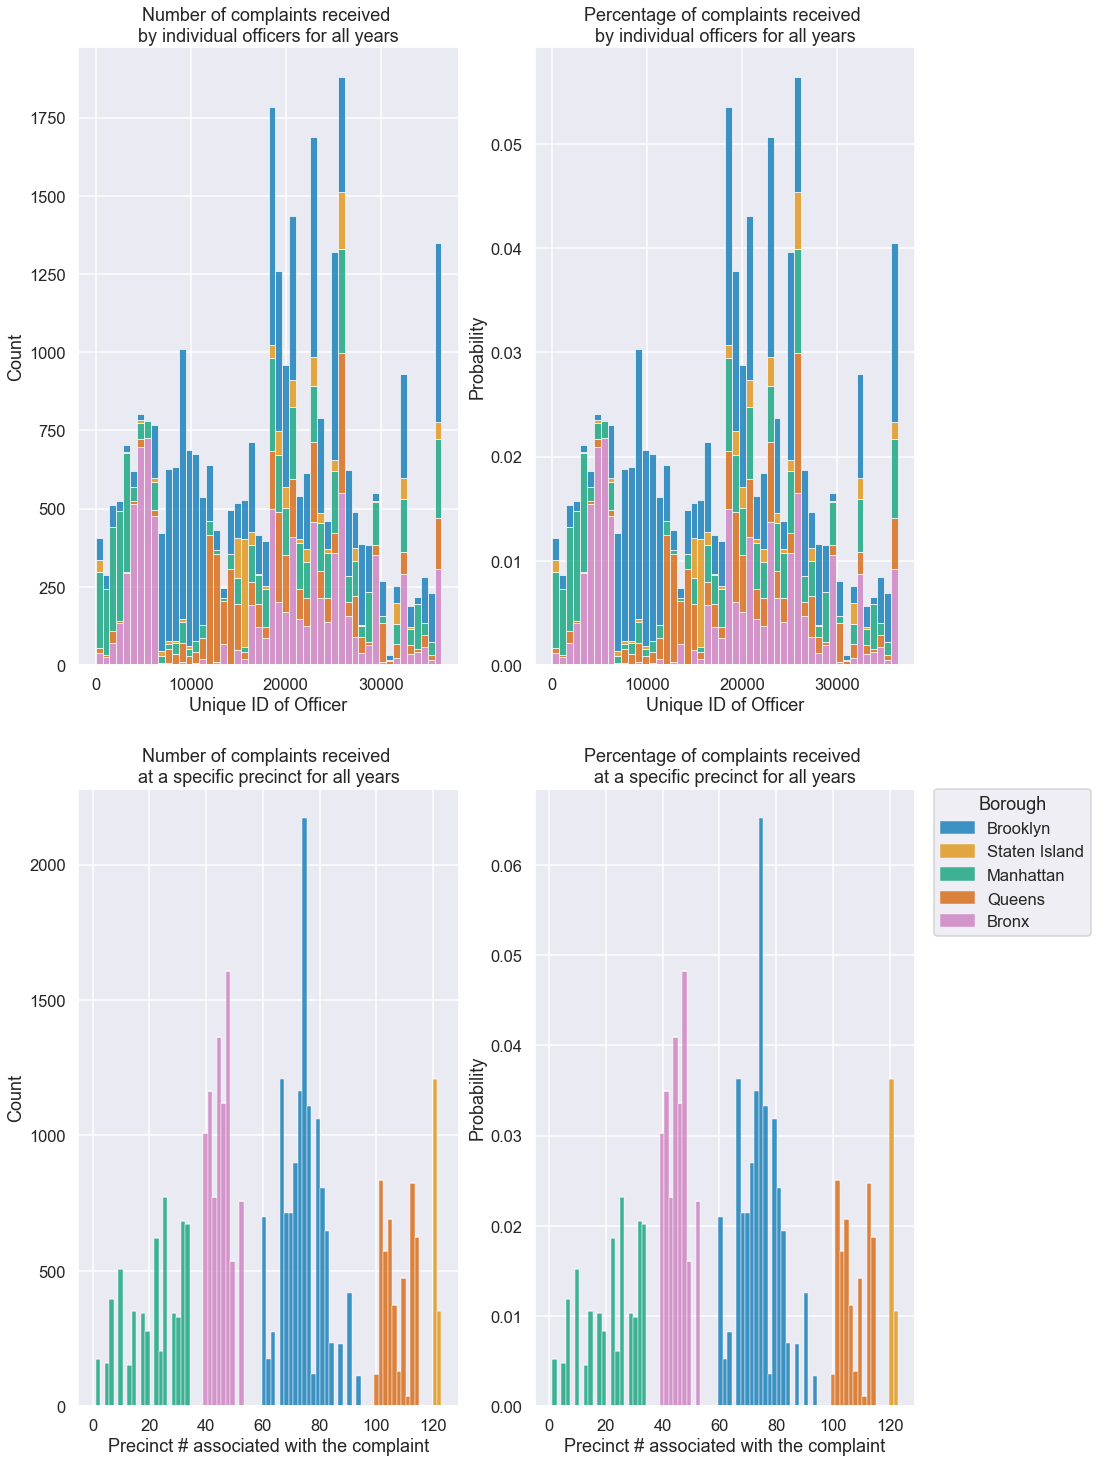

In [52]:
# plot side by side
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, sharey = False, figsize=(15, 25))

sns.set()
sns.set_context("talk", font_scale = 1) 

# counts for officers
plot_uniqueMosID = make_histplot(df_allegations, "unique_mos_id", "count", "borough", 50, ax00, 
                                 "Number of complaints received \nby individual officers for all years", 
                                 "Unique ID of Officer")
# probability for officiers
plot_uniqueMosID_prob = make_histplot(df_allegations, "unique_mos_id", "probability", "borough", 50, ax01, 
                                 "Percentage of complaints received \nby individual officers for all years", 
                                 "Unique ID of Officer")
# counts for precincts
plot_precinct = make_histplot(df_allegations, "precinct", "count", "borough", 77, ax10, 
                                 "Number of complaints received \nat a specific precinct for all years", 
                                 "Precinct # associated with the complaint")
# probability for precincts
plot_precinct_prob = make_histplot(df_allegations, "precinct", "probability", "borough", 77, ax11, 
                                 "Percentage of complaints received \nat a specific precinct for all years", 
                                 "Precinct # associated with the complaint")
# create manual legend
create_legend(2)

plt.show()

From looking at the above histograms I can see that the officers with the most complaints have an ID of roughly 20000-25000. It appears that these offices get a lot of complaints in the Bronx and Brooklyn. For the precincts we see that 40-50 (which are in the Bronx) and ~65-80 (which are in Brooklyn) have the most complaints. This seems to be the same issue as for where the cops get the complaints. It also appears that several cops receive much more complaints than other officers. 

Interestingly enough Queens has relatively few complaints despite its large non-white Asian population, where as Staten Island has more complaints despite its high proportion of whites. Manhattan has the least complaints, and is also majority white and incredibly wealthy. 

## Complaints broken down by race
<a id = "comp_race"></a>

In the above we looked at how the complaints broke down by borough, but the data does include the various features of both the officer and the complainant (age, gender, race). 

### Race of complainants
<a id = "race_complainants"></a>

Let's look to see who is filing the most complaints against the NYPD, and thus the individuals with the most exposure to and incidents with the NYPD.

In [53]:
def make_histplotLegend(df_in, xVal, statVal, hueVal, binNum, axPosition, titleVal, xLabVal):
    """
    function to create histograms

    Parameters
    ----------
    df_in: input dataframe
    xVal: column to use for x axis
    statVal: aggregate statistic to compute in each bin (e.g. count or porbability)
    binNum: number of bins
    axPosition: position of plot in grid of subplots
    titleVal: the main title string
    xLabVal: the x axis title string
    
    Returns
    ----------
    plot: the customized histogram
    """
    plot = sns.histplot(
        data = df_in, 
        x = xVal,
        stat = statVal,
        hue = hueVal,
        multiple = "stack",
        palette = "colorblind",
        bins = binNum,
        ax = axPosition
    )
    
    # set plot labels
    plot.set(
        title = titleVal, 
        xlabel = xLabVal
    )
    
    return plot

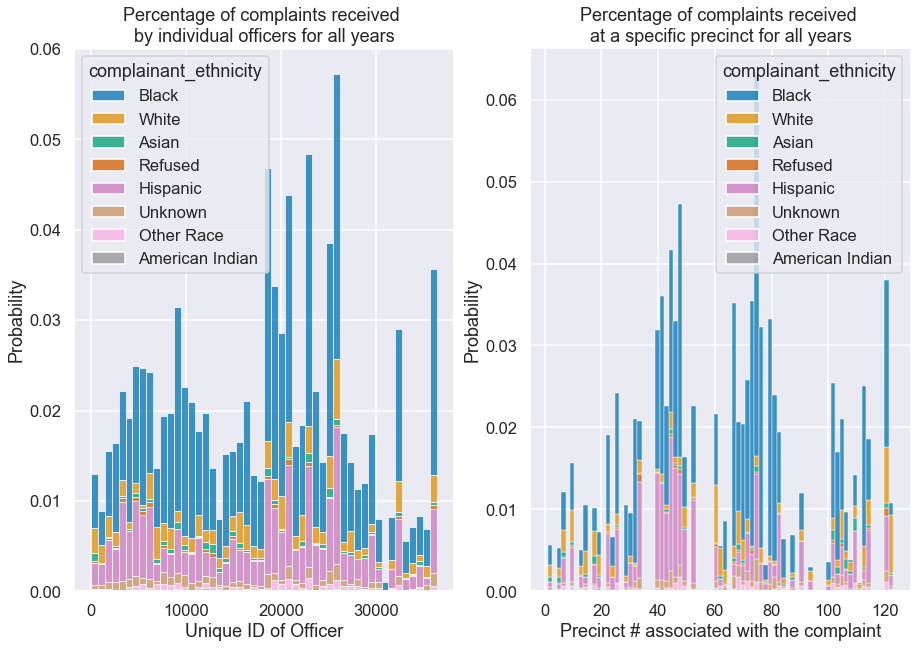

In [54]:
# plot side by side
fig, (ax0,ax1) = plt.subplots(1, 2, sharey = False, figsize=(15, 10))

sns.set()
sns.set_context("talk", font_scale = 1) 

# probability for officiers
hist_race_id_complain = make_histplotLegend(df_allegations, "unique_mos_id", "probability", "complainant_ethnicity", 50, ax0, 
                                 "Percentage of complaints received \nby individual officers for all years", 
                                 "Unique ID of Officer")
# probability for precincts
hist_race_pre_complain = make_histplotLegend(df_allegations, "precinct", "probability", "complainant_ethnicity", 77, ax1, 
                                 "Percentage of complaints received \nat a specific precinct for all years", 
                                 "Precinct # associated with the complaint")

plt.show()

Indeed, the people filing the most complaints against the NYPD are black individuals, followed by Hispanic individuals. Even in boroughs that are majority white by large margins (Manhattan and Staten Island) we see that black individuals file the most incident complaints in every borough. Asian individuals file some of the smallest numbers of complaints, which might explain why Queens, with such a large population and such a large Asian community, files much less complaints than you might expect for its population (see section below for details).

### Race of officers
<a id = "race_officers"></a>

Let's look to see who the officers that receive the complaints are.

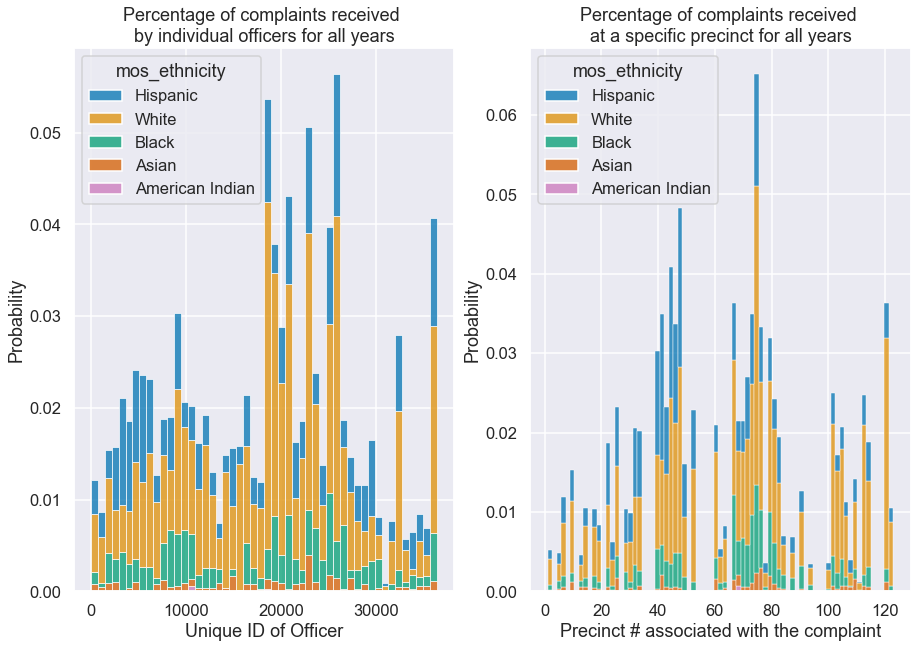

In [55]:
# plot side by side
fig, (ax0,ax1) = plt.subplots(1, 2, sharey = False, figsize=(15, 10))

sns.set()
sns.set_context("talk", font_scale = 1) 

# probability for officiers
hist_race_id_mos = make_histplotLegend(df_allegations, "unique_mos_id", "probability", "mos_ethnicity", 50, ax0, 
                                 "Percentage of complaints received \nby individual officers for all years", 
                                 "Unique ID of Officer")
# probability for precincts
hist_race_pre_mos = make_histplotLegend(df_allegations, "precinct", "probability", "mos_ethnicity", 77, ax1, 
                                 "Percentage of complaints received \nat a specific precinct for all years", 
                                 "Precinct # associated with the complaint")

plt.show()

By and large police officers and precincts that receive complaints are white, with the next largest group being hispanic. Black individuals account for very few police officers.

# Complaints over the years
<a id = "comp_years"></a>

## Absolute number and relative proportion of complaints
<a id = "abs_comp_yr"></a>

Let's look at how the number of complaints each year has changed. But first, in order to do so, I'll need to create new data from which to plot.

In [56]:
def make_df_count_uniques(df_in, featureName, colTitle, countTitle):
    """
    function to make a dataframe that contains the count of unique values in a column from an input dataframe

    Parameters
    ----------
    df_in: input dataframe
    featureName: column in which you wish to count unique values
    colTitle: title of the new column
    countTitle: title of count column
    
    Returns
    ----------
    df_out: dataframe with counts of unique values
    """
    # get the count of unique values in a column using value_counts()
    series = df_in[featureName].value_counts()
    # create a dict and pass this as the data param to the dataframe constructor
    df_out = pd.DataFrame({colTitle: series.index, countTitle: series.values})
    # convert all elements to int
    df_out.astype("int")
    # sort by the new column of unique values
    df_out = df_out.sort_values(by=[colTitle])
    # reset index
    df_out = df_out.reset_index(drop=True)
    return df_out

In [57]:
# create dataframes of counts using above function
df_yr_rec = make_df_count_uniques(df_allegations, "year_received", "year_rec", "received")
df_yr_clo = make_df_count_uniques(df_allegations, "year_closed", "year_clo", "closed")
# combine two dataframes
df_yr_counts = pd.concat([df_yr_rec, df_yr_clo], axis=1, sort=False)
# delete year_clo
del df_yr_counts["year_clo"]
# rename year_rec
df_yr_counts = df_yr_counts.rename(columns={"year_rec": "year"})
# set index to year
df_yr_counts = df_yr_counts.set_index("year")
# tail
df_yr_counts.tail()

received  closed
year                  
2016      2345    2408
2017      2178    1945
2018      2278    1635
2019      1642    2323
2020         4    1256

In [58]:
# Make a copy of df_yr_counts
# deep = True means that modifications to the data or indices of the copy will not be reflected in the original object 
df_yr_cnt_rel = df_yr_counts.copy(deep=True)
# delete counts columns
del df_yr_cnt_rel["received"]
del df_yr_cnt_rel["closed"]
# total number of complaints
tot_num_counts = len(df_allegations)
# create new columns
df_yr_cnt_rel["received"] = (df_yr_counts["received"]/tot_num_counts)*100
df_yr_cnt_rel["closed"] = (df_yr_counts["closed"]/tot_num_counts)*100
# tail
df_yr_cnt_rel.tail()

received    closed
year                    
2016  7.034859  7.223856
2017  6.533869  5.834883
2018  6.833863  4.904902
2019  4.925901  6.968861
2020  0.012000  3.767925

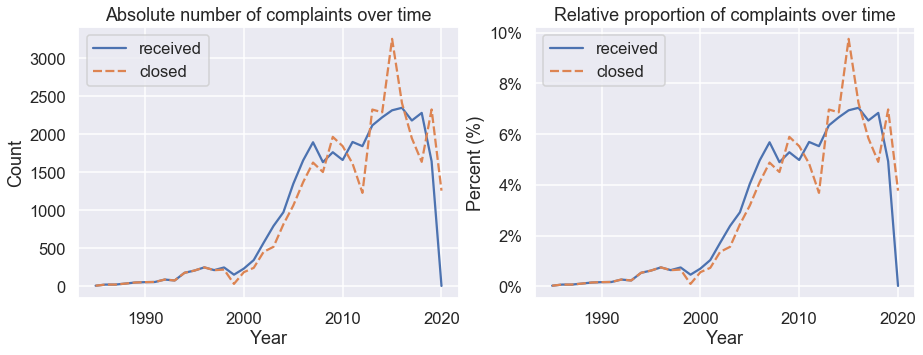

In [59]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey = False, figsize=(15, 5)) 

plot_yrs_cnt_abs = sns.lineplot(data = df_yr_counts, ax = ax0)

plot_yrs_cnt_abs.set(
    title = "Absolute number of complaints over time", 
    ylabel = "Count",
    xlabel = "Year"
)

plot_yrs_cnt_rel = sns.lineplot(data = df_yr_cnt_rel, ax = ax1)

plot_yrs_cnt_rel.set(
    title = "Relative proportion of complaints over time", 
    ylabel = "Percent (%)",
    xlabel = "Year"
)

# set yaxis scale
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) + "%"))

plt.show()

We see that as we move away from 1985 the number of complaints against the NYPD increases. The most requests received occured in 2016, and the most request closed occured in 2015. The BLM protests started back in 2013, which you might have expected to lead to an increase in complaints against the NYPD, and that does indeed appear to be the case. It seems the complaints escalated to a peak right before and during the election year. There is another peak in complaints in 2019, the start of a new wave of ongoing BLM protests, and 2020 rates of requests being received and closed might be so low due to the COVID-19 pandemic and quarantine restrictions.  

What I do find interesting is that for the most part the number of closed complaints followed the trend of received complaints up until about \~2009, and then the number of closed complaints takes a deep dip in \~2011 only to shoot back up in \~2015. For the most part from 1985 until the mid 2000s there was a steady growth in complaints which might simply be increasing due to increases in population in NYC. Luckily, we have the NYC census data starting 

## Absolute and relative number of Complaints per borough
<a id = "comp_boro_person"></a>

### Absolute number of complaints
<a id = "comp_boro_person_abs"></a>

Now let's see what the complaindf_allegationst numbers per borough and the complaints per borough per person look. I expect the Bronx and Brooklyn to have high numbers of complaints as we saw above, but maybe their large populations will mean each borough has roughly the same number of complaints per population.

In [60]:
def makeDF_compYear(df_in, colNameYear, colNameComplaints):
    """
    function to make a dataframe that contains the count of coomplaints per year for a specific borough

    Parameters
    ----------
    df_in: input dataframe
    colNameYear: column name for the year (either received or closed)
    colNameComplaints: column name for the complaints (either received or closed)
    
    Returns
    ----------
    df_out: output dataframe
    """
    # make lists of years and boroughs
    yearTot_list = list(df_in[colNameYear].unique())
    boroTot_list = list(df_in["borough"].unique())
    # remove NANs from list
    yearTot_list = [x for x in yearTot_list if str(x) != "nan"]
    boroTot_list = [x for x in boroTot_list if str(x) != "nan"]
    # empty double nested list
    lst = [[] for _ in range(len(yearTot_list))]
    
    # 2 nested 4 loops
    # loop through the years
    for y in range(len(yearTot_list)):
        # loop through the boroughs
        for b in range(len(boroTot_list)):
            # Get a bool series representing which row satisfies the condition 
            temp_df = df_in.apply(lambda x : True 
                                           if (x[colNameYear] == yearTot_list[y] and x["borough"] == boroTot_list[b]) 
                                           else False, axis = 1)
            # Count number of True in the series 
            num_rows = len(temp_df[temp_df == True].index) 
            lst[y].append(yearTot_list[y])
            lst[y].append(boroTot_list[b])
            lst[y].append(num_rows)
    
    # column names have to be repeating bc of how double nested list was made
    newColNames = ["Year1", "Borough1", "Number of Complaints1", 
                   "Year2", "Borough2", "Number of Complaints2",
                   "Year3", "Borough3", "Number of Complaints3",
                   "Year4", "Borough4", "Number of Complaints4",
                   "Year5", "Borough5", "Number of Complaints5"
                  ]
    baseColNames = ["Year", "Borough", colNameComplaints]
    
    # create dataframe from double nested list
    df_new = pd.DataFrame(lst[0:], columns = newColNames)
    
    # get columns by 3 and create new df
    df1 = df_new[df_new.columns[:3]]
    df2 = df_new[df_new.columns[3:6]]
    df3 = df_new[df_new.columns[6:9]]
    df4 = df_new[df_new.columns[9:12]]
    df5 = df_new[df_new.columns[12:15]]
    
    # rename columns
    df1.columns = baseColNames
    df2.columns = baseColNames
    df3.columns = baseColNames
    df4.columns = baseColNames
    df5.columns = baseColNames
    
    # merge these dataframes row-wise
    df_out = pd.concat([df1, df2, df3, df4, df5])
    # change type of year and complaints to int
    df_out = df_out.astype({"Year": int, colNameComplaints: int})
    # sort by year
    df_out = df_out.sort_values(by=["Year"])
    # reset index
    df_out = df_out.reset_index(drop=True)
    
    return df_out

In [61]:
# this function takes a little time to run
df_compBoroRec = makeDF_compYear(df_allegations, "year_received", "Num Complaints Received")
df_compBoroClo = makeDF_compYear(df_allegations, "year_closed", "Num Complaints Closed")

In [62]:
df_CombineComplaints = df_compBoroRec
df_CombineComplaints["Num Complaints Closed"] = df_compBoroClo["Num Complaints Closed"]
df_CombineComplaints.tail()

Year        Borough  Num Complaints Received  Num Complaints Closed
175  2020         Queens                        0                    160
176  2020      Manhattan                        1                    315
177  2020  Staten Island                        0                     57
178  2020       Brooklyn                        3                    184
179  2020          Bronx                        0                    539

Now I need the sums of the number of complaints each year, because I need to divide the number of complaints each borough received in a year by the total for that year.

In [63]:
# make lists of years and boroughs
yearTot_list = list(df_allegations["year_received"].unique())
# remove NANs from list
yearTot_list = [x for x in yearTot_list if str(x) != "nan"]
# empty dataframe with column names
df_allComplaints = pd.DataFrame(columns = ["Year", "Borough", "Num Complaints Received", "Num Complaints Closed"])
# loop through the years
for y in range(len(yearTot_list)):
    # gets sums of complaints
    dataTemp = list(df_CombineComplaints.loc[df_CombineComplaints['Year'] == yearTot_list[y], 
                                             ["Num Complaints Received", "Num Complaints Closed"]].sum())
    # get year and NYC total
    temp = [yearTot_list[y], "NYC Total"]
    # combine results
    to_append = temp + dataTemp
    # append to end of df
    df_allComplaints.loc[len(df_allComplaints)] = to_append

In [64]:
# combine df
df_all2 = pd.concat([df_CombineComplaints, df_allComplaints])
# sort by year
df_all2 = df_all2.sort_values(by=["Year"])
# reset index
df_all2 = df_all2.reset_index(drop=True)
# change type of year and complaints to int
df_all2 = df_all2.astype({"Year": int, "Num Complaints Received": int, "Num Complaints Closed": int})
# take log of number complaints
df_all2["Log(Complaints Rec)"] = np.log(df_all2["Num Complaints Received"])
df_all2["Log(Complaints Clo)"] = np.log(df_all2["Num Complaints Closed"])
df_all2[:10]

Year        Borough  Num Complaints Received  Num Complaints Closed  \
0  1985         Queens                        0                      0   
1  1985          Bronx                        0                      0   
2  1985      Manhattan                        0                      0   
3  1985       Brooklyn                        7                      0   
4  1985  Staten Island                        0                      7   
5  1985      NYC Total                        7                      7   
6  1986  Staten Island                        0                      0   
7  1986       Brooklyn                       17                      0   
8  1986      NYC Total                       22                     22   
9  1986          Bronx                        0                      0   

   Log(Complaints Rec)  Log(Complaints Clo)  
0                 -inf                 -inf  
1                 -inf                 -inf  
2                 -inf                 -inf  
3             1.945910                 -inf  
4                 -inf             1.945910  
5             1.945910             1.945910  
6                 -inf                 -inf  
7             2.833213                 -inf  
8             3.091042             3.091042  
9                 -inf                 -inf

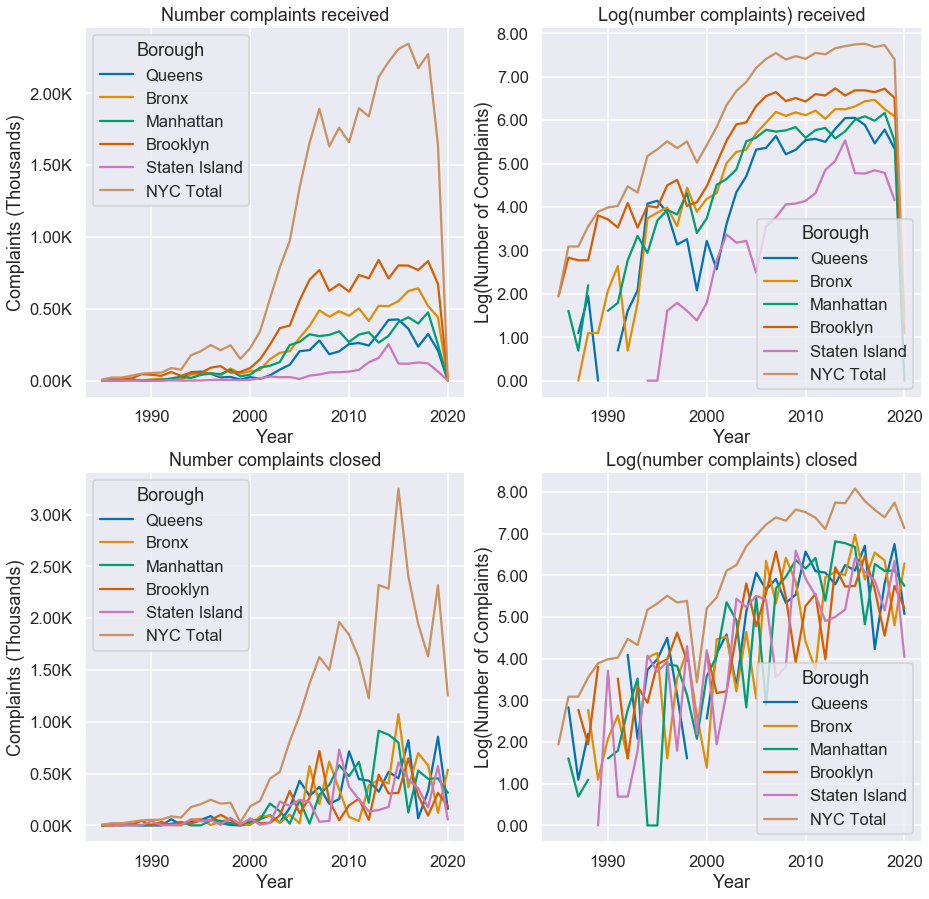

In [65]:
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, sharey = False, figsize = (15, 15))

plot_numRec = make_linplot(df_all2, "Year", "Num Complaints Received", "Borough", ax00, 1e3, "K", 
                           "Number complaints received", "Year", "Complaints (Thousands)")

plot_numRec_log = make_linplot(df_all2, "Year", "Log(Complaints Rec)", "Borough", ax01, 1, "", 
                           "Log(number complaints) received", "Year", "Log(Number of Complaints)")

plot_numClo = make_linplot(df_all2, "Year", "Num Complaints Closed", "Borough", ax10, 1e3, "K", 
                           "Number complaints closed", "Year", "Complaints (Thousands)")

plot_numClo_log = make_linplot(df_all2, "Year", "Log(Complaints Clo)", "Borough", ax11, 1, "", 
                           "Log(number complaints) closed", "Year", "Log(Number of Complaints)")

plt.show()

The number of complaints received does indeed reflect the populations of the five boroughs. Brooklyn receives the most complaints and is the most populous borough, whereas Staten Island receives the least complaints and is the least populous borough. Usually log plots help elucidate the difference between data by showing orders of magnitude, but there is a lot of overlap in the data.

The number of complaints closed does not seem to follow an appreciable pattern. We might have expected a similar curve to the complaints received, but it appears that complaints received in the boroughs almost get completed at random regardless of which borough you come from.

### Relative number of complaints
<a id = "comp_boro_person_rel"></a>

Let's look at how the boroughs compare with percentages of complaints.

In [66]:
# repeat every row 5 times
newdf = pd.DataFrame(np.repeat(df_allComplaints.values, 5, axis=0))
# set columns
newdf.columns = df_allComplaints.columns
# set types of columns
newdf = newdf.astype({"Year": int, "Num Complaints Received": int, "Num Complaints Closed": int})
# sort by year
newdf = newdf.sort_values(by=["Year"])
# reset index
newdf = newdf.reset_index(drop=True)
newdf.dtypes

Year                        int64
Borough                    object
Num Complaints Received     int64
Num Complaints Closed       int64
dtype: object

In [67]:
# empty dataframe with column names
df_percents = pd.DataFrame(columns = ["Num Complaints Received", "Num Complaints Closed"])
# calculate % complaints for each year
for y in range(len(yearTot_list)):
    df_temp = (df_CombineComplaints.loc[df_CombineComplaints['Year'] == yearTot_list[y], ["Num Complaints Received", "Num Complaints Closed"]]/newdf.loc[newdf['Year'] == yearTot_list[y], ["Num Complaints Received", "Num Complaints Closed"]])*100
    df_percents = pd.concat([df_percents, df_temp])
# add year and borough data
    df_percents["Year"] = df_CombineComplaints['Year']
df_percents["Borough"] = df_CombineComplaints['Borough']
# rename columns
df_percents = df_percents.rename(columns={"Num Complaints Received": "% Received", "Num Complaints Closed": "% Closed"})
df_percents

% Received   % Closed  Year        Borough
170   41.061623  13.540319  2019       Brooklyn
171   12.812691  36.869340  2019         Queens
172   15.314216  19.620526  2019      Manhattan
173    3.904820  24.708926  2019  Staten Island
174   26.906650   5.260888  2019          Bronx
..          ...        ...   ...            ...
175    0.000000  12.749004  2020         Queens
176   25.000000  25.099602  2020      Manhattan
177    0.000000   4.541833  2020  Staten Island
178   75.000000  14.661355  2020       Brooklyn
179    0.000000  42.948207  2020          Bronx

[180 rows x 4 columns]

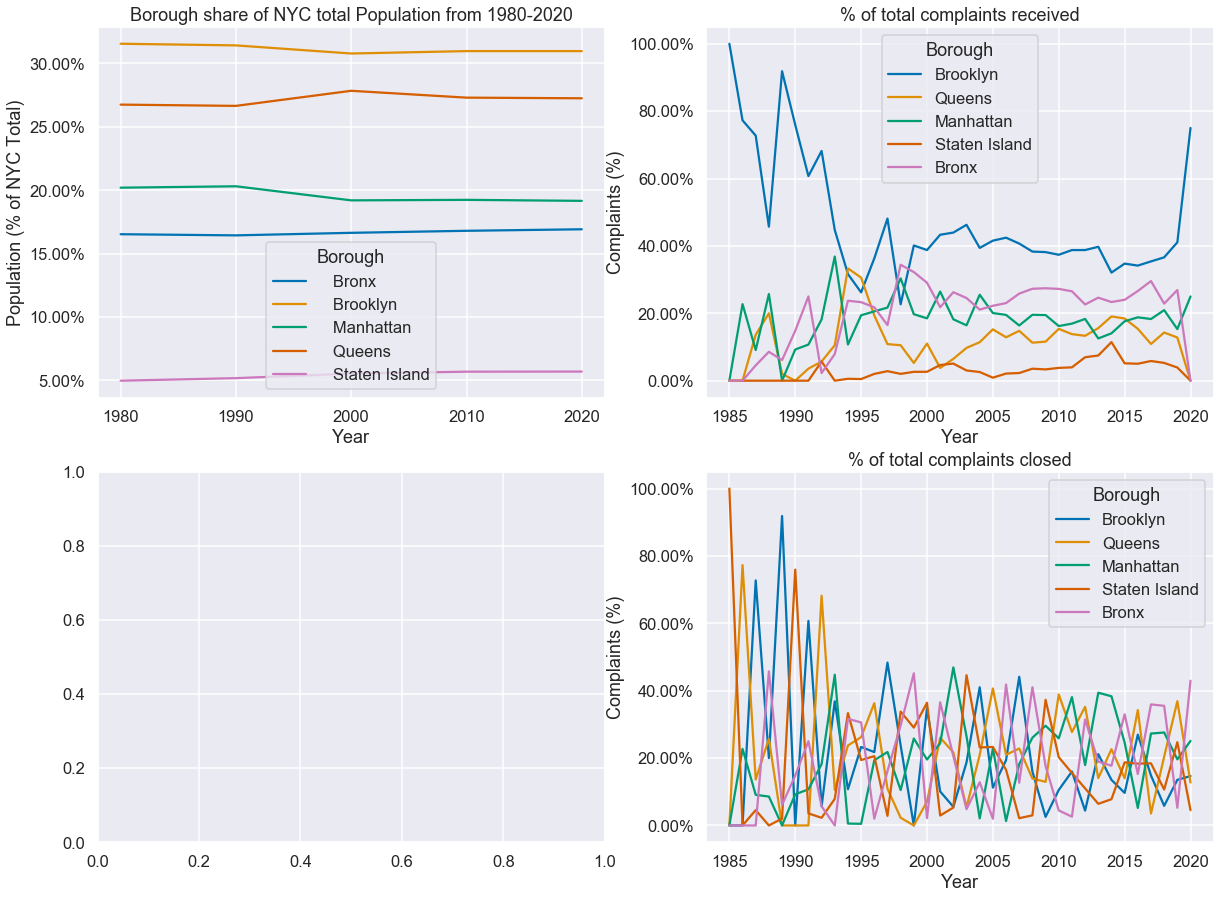

In [68]:
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(2, 2, sharey = False, figsize = (20, 15))

plot_nycpop_share = make_linplot(df_nycpop_copy2, "Year", "Boro share of NYC total", "Borough", ax00, 1, "%", 
                           "Borough share of NYC total Population from 1980-2020", 
                               "Year", "Population (% of NYC Total)")

plot_per_rec = make_linplot(df_percents, "Year", "% Received", "Borough", ax01, 1, "%", 
                           "% of total complaints received", "Year", "Complaints (%)")

plot_per_clo = make_linplot(df_percents, "Year", "% Closed", "Borough", ax11, 1, "%", 
                           "% of total complaints closed", "Year", "Complaints (%)")

plt.show()

As we saw before the borough you come from has no effect on when the complaint is closed, it's basically a toss-up for when the complaint will be closed. As for the complaints received, we see something quite interesting. From earlier we know that Brooklyn \~30% of the NYC population, and yet they easily for almost every year we have data have over \~40% of the complaints received. We also know that proportionally Brooklyn has one of the largest black communities, right after the Bronx. We expect Queens to have \~27% of the complaints received but instead it falls below \~20% to sometimes even as low as \~10%.  The Bronx has \~15% of the population and yet \~30% of the complaints, and is the borough with the largest black population. We see that Staten Island does have both the smallest population and the smallest number of complaints, and Manhattan also has \~20% of the population and \~20% of the complaints. It seems, however, that the more diverse the borough the more complaints received against the police, and in numbers that cannot be explained by just the total population growth of said borough. 

# Officers with most complaints
<a id = "top_offend"></a>

Let's look to see which officers have the most complaints.

In [69]:
officer_most_complaints = df_allegations.unique_mos_id.mode()
officer_most_complaints

0    18731
1    25861
dtype: int64

In [70]:
df_officer1 = df_allegations[df_allegations["unique_mos_id"] == officer_most_complaints[0]]
df_officer1.head()

unique_mos_id first_name last_name      full_name command_now  \
7846          18731     Daniel    Sbarra  Daniel Sbarra     DB CEIS   
7847          18731     Daniel    Sbarra  Daniel Sbarra     DB CEIS   
7848          18731     Daniel    Sbarra  Daniel Sbarra     DB CEIS   
7849          18731     Daniel    Sbarra  Daniel Sbarra     DB CEIS   
7850          18731     Daniel    Sbarra  Daniel Sbarra     DB CEIS   

      shield_no  complaint_id  month_received  year_received date_received  \
7846          0          6832               9           2003        2003-9   
7847          0          6832               9           2003        2003-9   
7848          0          7174               1           2004        2004-1   
7849          0          7174               1           2004        2004-1   
7850          0          8351              10           2004       2004-10   

      ...  complainant_ethnicity  complainant_gender complainant_age_incident  \
7846  ...               Hispanic                Male                     39.0   
7847  ...               Hispanic                Male                     39.0   
7848  ...               Hispanic                Male                     30.0   
7849  ...               Hispanic                Male                     30.0   
7850  ...                  Black                Male                     28.0   

               fado_type      allegation precinct  contact_reason  \
7846         Discourtesy            Word     83.0           Other   
7847               Force  Physical force     83.0           Other   
7848               Force  Physical force     83.0  EDP aided case   
7849  Abuse of Authority           Other     83.0  EDP aided case   
7850  Abuse of Authority    Vehicle stop     83.0           Other   

                   outcome_description        board_disposition   borough  
7846  No arrest made or summons issued          Unsubstantiated  Brooklyn  
7847  No arrest made or summons issued               Exonerated  Brooklyn  
7848  No arrest made or summons issued          Unsubstantiated  Brooklyn  
7849  No arrest made or summons issued          Unsubstantiated  Brooklyn  
7850  No arrest made or summons issued  Substantiated (Charges)  Brooklyn  

[5 rows x 31 columns]

In [71]:
df_officer2 = df_allegations[df_allegations["unique_mos_id"] == officer_most_complaints[1]]
df_officer2.head()

unique_mos_id first_name last_name     full_name command_now  \
19373          25861     Mathew     Reich  Mathew Reich     NARCBSI   
19374          25861     Mathew     Reich  Mathew Reich     NARCBSI   
19375          25861     Mathew     Reich  Mathew Reich     NARCBSI   
19376          25861     Mathew     Reich  Mathew Reich     NARCBSI   
19377          25861     Mathew     Reich  Mathew Reich     NARCBSI   

       shield_no  complaint_id  month_received  year_received date_received  \
19373        122          9066               3           2005        2005-3   
19374        122          9066               3           2005        2005-3   
19375        122          9066               3           2005        2005-3   
19376        122          9335               5           2005        2005-5   
19377        122         13162               3           2007        2007-3   

       ...  complainant_ethnicity  complainant_gender  \
19373  ...               Hispanic                Male   
19374  ...               Hispanic                Male   
19375  ...               Hispanic                Male   
19376  ...                Unknown                Male   
19377  ...                  Black                Male   

      complainant_age_incident           fado_type  \
19373                     60.0         Discourtesy   
19374                     60.0  Abuse of Authority   
19375                     60.0  Abuse of Authority   
19376                     15.0               Force   
19377                     31.0  Abuse of Authority   

                                  allegation precinct  \
19373                                   Word     75.0   
19374                   Question and/or stop     75.0   
19375  Refusal to provide name/shield number     75.0   
19376                         Physical force     75.0   
19377                     Search (of person)     67.0   

                                     contact_reason  \
19373  PD suspected C/V of violation/crime - street   
19374  PD suspected C/V of violation/crime - street   
19375  PD suspected C/V of violation/crime - street   
19376                         Report of other crime   
19377    PD suspected C/V of violation/crime - auto   

                    outcome_description        board_disposition   borough  
19373      Summons - disorderly conduct               Exonerated  Brooklyn  
19374      Summons - disorderly conduct  Substantiated (Charges)  Brooklyn  
19375      Summons - disorderly conduct  Substantiated (Charges)  Brooklyn  
19376    Arrest - other violation/crime          Unsubstantiated  Brooklyn  
19377  No arrest made or summons issued          Unsubstantiated  Brooklyn  

[5 rows x 31 columns]

In [72]:
print("There are two officers tied for most complaints.")
print("The first is", df_officer1["full_name"].unique()[0], "with", len(df_officer1), "complaints.")
print("The second is", df_officer2["full_name"].unique()[0], "with", len(df_officer2), "complaints.")

There are two officers tied for most complaints.
The first is Daniel Sbarra with 75 complaints.
The second is Mathew Reich with 75 complaints.


## First Officer
<a id = "offend1"></a>

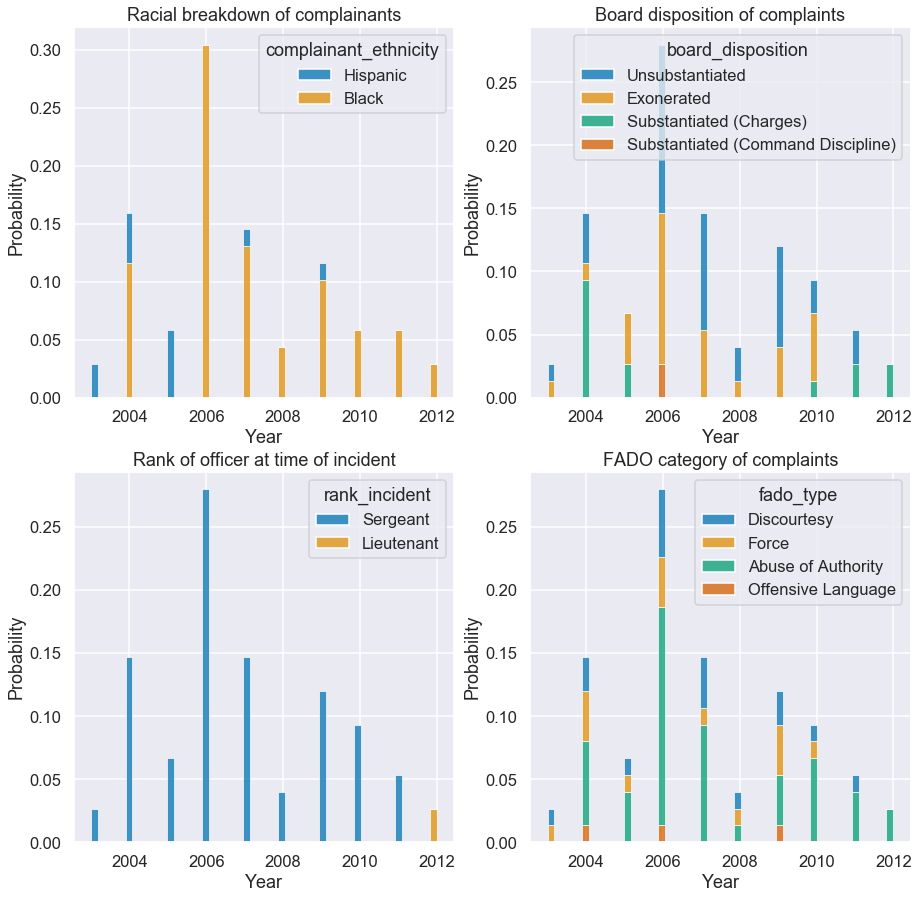

In [73]:
# plot side by side
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, sharey = False, figsize=(15, 15))

sns.set()
sns.set_context("talk", font_scale = 1) 

hist1 = make_histplotLegend(df_officer1, "year_received", "probability", "complainant_ethnicity", 50, ax00, 
                                 "Racial breakdown of complainants", 
                                 "Year")

hist2 = make_histplotLegend(df_officer1, "year_received", "probability", "board_disposition", 50, ax01, 
                                 "Board disposition of complaints", 
                                 "Year")


hist3 = make_histplotLegend(df_officer1, "year_received", "probability", "rank_incident", 50, ax10, 
                                 "Rank of officer at time of incident", 
                                 "Year")

hist4 = make_histplotLegend(df_officer1, "year_received", "probability", "fado_type", 50, ax11, 
                                 "FADO category of complaints", 
                                 "Year")

plt.show()

All of the complaints against Sbarra have been from either black individuals or hispanic individuals. It should be noted that he does work in Brooklyn. There are several board dispositions associated with the complaints. The decisions are as follows:
1. Substantiated: 
    1. The alleged conduct occurred and it violated the rules. The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed.
1. Exonerated: 
    1. The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force.
1. Unsubstantiated:
    1. The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules.

It seems that the majority of the complaints against Sbarra were either found to be Unsubstantiated or Exonerated. There *were* several that were substantiated and resulted in command discipline, and a good majority of Sbarra's complaints were for abuse of authority. 

## Second Officer
<a id = "offend2"></a>

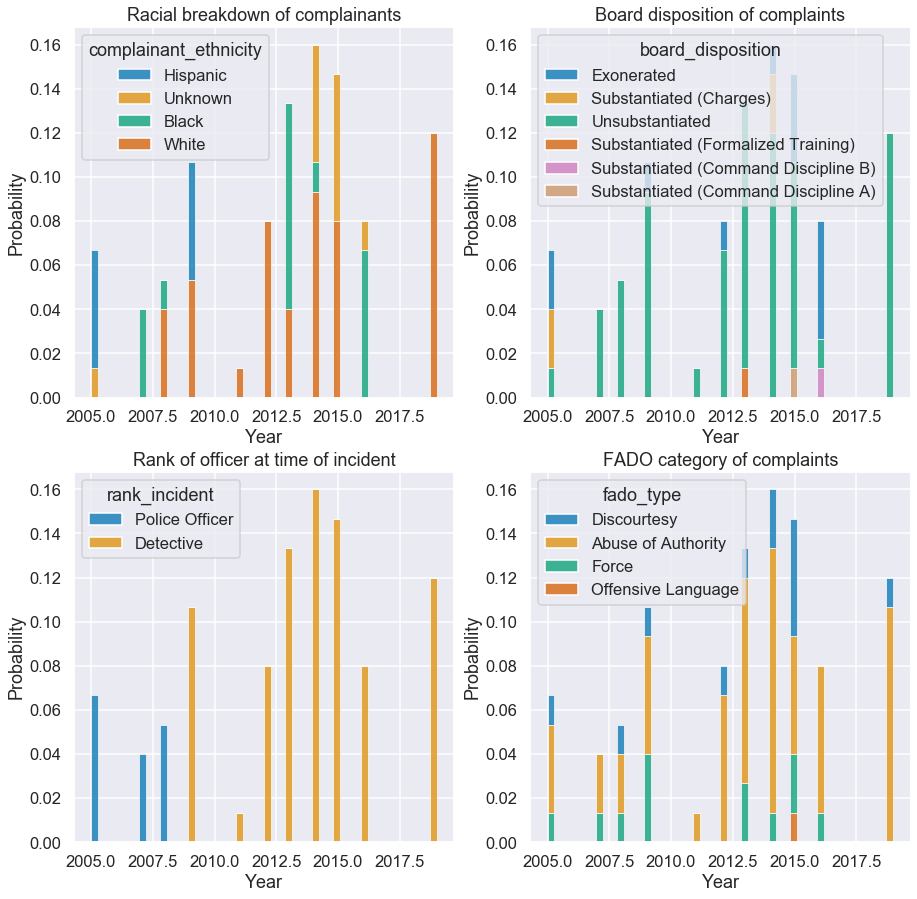

In [74]:
# plot side by side
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, sharey = False, figsize=(15, 15))

sns.set()
sns.set_context("talk", font_scale = 1) 

hist1 = make_histplotLegend(df_officer2, "year_received", "probability", "complainant_ethnicity", 50, ax00, 
                                 "Racial breakdown of complainants", 
                                 "Year")

hist2 = make_histplotLegend(df_officer2, "year_received", "probability", "board_disposition", 50, ax01, 
                                 "Board disposition of complaints", 
                                 "Year")


hist3 = make_histplotLegend(df_officer2, "year_received", "probability", "rank_incident", 50, ax10, 
                                 "Rank of officer at time of incident", 
                                 "Year")

hist4 = make_histplotLegend(df_officer2, "year_received", "probability", "fado_type", 50, ax11, 
                                 "FADO category of complaints", 
                                 "Year")

plt.show()

Reich has a much different history than Sbarra. Reich works in the Narcotics Borough of Staten Island and the majority of individuals filing incidents against Reich are white. The majority of the complaints against Reich were found to be unsubstantiated. Reich could be potentially dealing with a lot of individuals involved with narcotics in Staten Island, and that might explain the fact that white people are mostly filing incidents with him. 

## Officers with top 1% of complaints
<a id = "top10"></a>

It is possible that there is a trend of who files complaints against the cops that have tho most complaints. We will sort them by how many complaints each officer has, and take the top 1% of those. 

In [108]:
import collections
# create list of officer IDs
IDs_list = list(df_allegations["unique_mos_id"])
# remove NANs from list
IDs_list = [x for x in IDs_list if str(x) != "nan"]
# frequency of elements in list
counter = collections.Counter(IDs_list)
# convert counter to df
df_counterIDs = pd.DataFrame.from_dict(counter, orient='index', columns=["Frequency"]).reset_index()
# rename index
df_counterIDs = df_counterIDs.rename(columns = {'index': 'Officer ID'})
# sort by frequency 
df_counterIDs = df_counterIDs.sort_values(by = ['Frequency'], ascending=False)
# show dataframe
df_counterIDs

Officer ID  Frequency
947        18731         75
2168       25861         75
1091       19489         73
884        18530         73
897        18589         72
...          ...        ...
682        16694          1
675        16633          1
673        16604          1
3204        3933          1
0          10004          1

[3994 rows x 2 columns]

Okay, we've got each officer's ID and the frequency of complaints against them. Let's look at the "top" officers, the ones that the most complaints. Because we're looking at the "top 5%" this will be most frequent 200 officers.

In [113]:
# get only top 200 officers
df_counterID_top5 = df_counterIDs[:200]
# create list of their IDs
top200_ID = (df_counterID_top5["Officer ID"])
# use list of IDs to create new df of their results
df_top200 = df_allegations.loc[df_allegations['unique_mos_id'].isin(top200_ID)]
# show df
df_top200.head()

unique_mos_id first_name  last_name        full_name command_now  \
12          10026      Brian  Alexander  Brian Alexander     079 DET   
13          10026      Brian  Alexander  Brian Alexander     079 DET   
14          10026      Brian  Alexander  Brian Alexander     079 DET   
15          10026      Brian  Alexander  Brian Alexander     079 DET   
16          10026      Brian  Alexander  Brian Alexander     079 DET   

    shield_no  complaint_id  month_received  year_received date_received  ...  \
12       3185         35092               5           2016        2016-5  ...   
13       3185         26353               8           2012        2012-8  ...   
14       3185         27482               3           2013        2013-3  ...   
15       3185         27482               3           2013        2013-3  ...   
16       3185         27482               3           2013        2013-3  ...   

    complainant_ethnicity  complainant_gender complainant_age_incident  \
12                  Black                Male                     30.0   
13                  Black                Male                     35.0   
14                  Black              Female                     42.0   
15                  Black              Female                     42.0   
16                  Black                Male                     46.0   

             fado_type           allegation precinct  \
12  Abuse of Authority   Search (of person)     79.0   
13               Force         Pepper spray     79.0   
14               Force       Physical force     79.0   
15  Offensive Language                 Race     79.0   
16               Force  Handcuffs too tight     79.0   

                                  contact_reason  \
12                              Moving violation   
13  PD suspected C/V of violation/crime - street   
14                         Regulatory inspection   
15                         Regulatory inspection   
16                         Regulatory inspection   

                 outcome_description board_disposition   borough  
12  No arrest made or summons issued   Unsubstantiated  Brooklyn  
13                      Arrest - OGA   Unsubstantiated  Brooklyn  
14    Arrest - other violation/crime        Exonerated  Brooklyn  
15    Arrest - other violation/crime   Unsubstantiated  Brooklyn  
16    Arrest - other violation/crime   Unsubstantiated  Brooklyn  

[5 rows x 31 columns]

Okay, let's give these results a look.

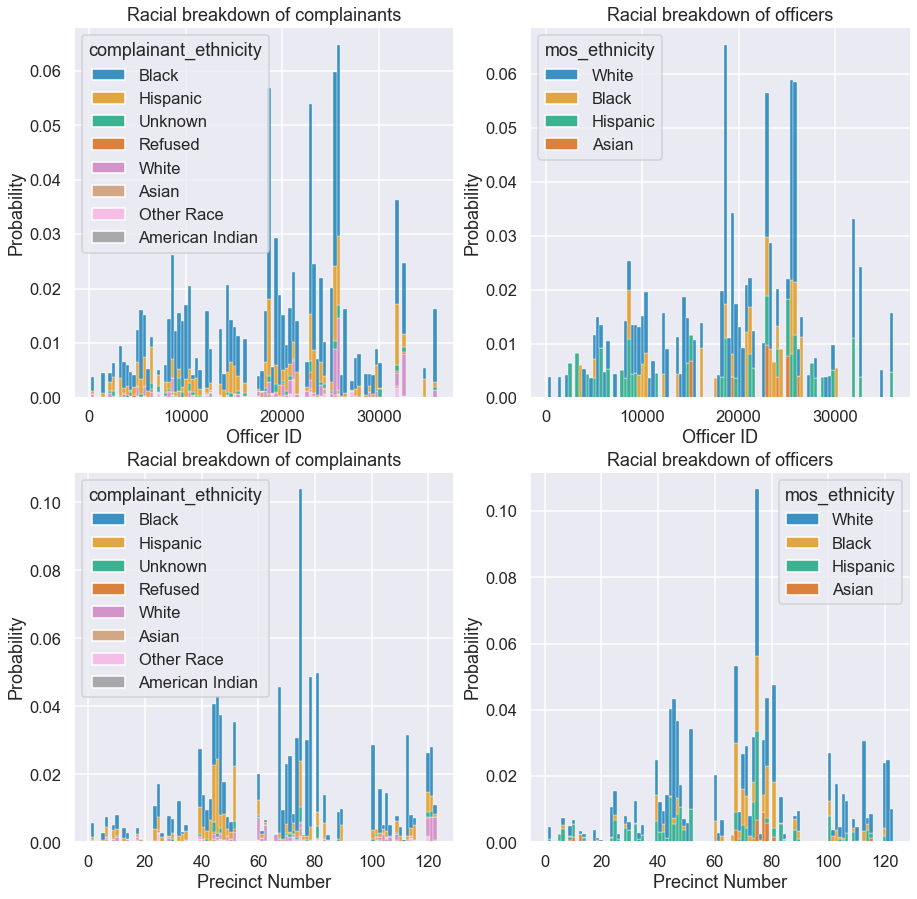

In [117]:
# plot side by side
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2, 2, sharey = False, figsize=(15, 15))

sns.set()
sns.set_context("talk", font_scale = 1) 

hist11 = make_histplotLegend(df_top200, "unique_mos_id", "probability", "complainant_ethnicity", 100, ax00, 
                                 "Racial breakdown of complainants", 
                                 "Officer ID")

hist21 = make_histplotLegend(df_top200, "unique_mos_id", "probability", "mos_ethnicity", 100, ax01, 
                                 "Racial breakdown of officers", 
                                 "Officer ID")


hist31 = make_histplotLegend(df_top200, "precinct", "probability", "complainant_ethnicity", 100, ax10, 
                                 "Racial breakdown of complainants", 
                                 "Precinct Number")

hist41 = make_histplotLegend(df_top200, "precinct", "probability", "mos_ethnicity", 100, ax11, 
                                 "Racial breakdown of officers", 
                                 "Precinct Number")

plt.show()

As we can see most of the complaints come from black individuals, followed by hispanic individuals. This is true across all the boroughs, when we consider the top 200 officers with the most complaints. This is true even in boroughs that have proportionally higher white populations, such as Manhattan or Staten Island. On the other hand, the majority of these cops are white. 

# Conclusion
<a id = "conclu"></a>

If there were no bias in targeting individuals of color we would expect the proportion of complaints to reflect the racial compositions of each borough. We would expect more black individuals to file complaints in the Bronx and Brooklyn simply because their populations are larger there, and that more white individuals would file in whiter boroughs such as Manhattan and Queens. We would also expect more Asian individuals to file complaints in Queens, which has such a large Asian community where compared proportionally to the other boroughs. However, this does not appear to be the case. Across the board we have seen that boroughs with more black individuals file more incidents against the NYPD than other boroughs, in percentages far greater than the borough's share of NYC's total population. In order to file an incident and complaint this means that you have had an encounter with the NYPD that was enough to make you file, meaning that in all boroughs, from what has been reported, black individuals have had more encounters with the NYPD than can be explained simply by increasing population values.